# Studienarbeit: Machine Learning
#### Saniye Ogul und Johannes Horst

### Imports
- plotly
- matplotlib
- pandas
- numpy
- scikit-learn

In [1]:
# Importe
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#import graphviz
from sklearn import tree
from matplotlib.dates import DateFormatter
import datetime as dt
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Aufgabe 1 (Klassifikation des Systemzustands)
Erstellung eines binären Klassifikationsmodell zur Vorhersage des aktuellen Zutands der APU (Air Production Unit) auf Basis der Sensordaten. Soll differenziert werden ob APU in Ordnung oder nicht ist (binäre Klassifikation)
zu verwendene Verfahren:
- einen nicht-parametrisierten Modellansatz,
- einen parametrisierten Modellansatz,
- ein Verfahren aus dem Bereich des Ensemble Learning.

Trainigsdatensatz erstellen z.B. durch geeignete Datentransformationen, Feature Engineering und ggf. Feature Extraction. Sequentielle Struktur der Daten soll berücksichtigt werden.
Wenden Sie zur Modellerstellung (in dieser und den folgenden Aufgaben) geeignete Maßnahmen und Techniken an, damit die resultierenden Modelle eine moglichst hohe Gute aufweisen und beurteilen Sie diese anhand geeigneter Kriterien. Modularisieren und automatisieren Sie Ihren Workflow, damit die einzelnen Schritte in den folgenden Aufgaben ggf.
wiederverwendet werden konnen. Achten Sie darauf, dass Ihre Modelle auf unbekannte Daten angewendet werden konnen, die ggf. fehlende Werte enthalten, auch wenn der gegebene Datensatz keine fehlenden Werte enthalt. Welche Features erweisen sich als besonders aussagekräftig für die gegebene Aufgabenstellung?

- **TP2** - Druck am Kompressor (bar).
- **TP3** - An der Pneumatikzentrale erzeugter Druck (bar).
- **H1** - Ventil, das aktiviert wird, wenn der vom Druckschalter der Steuerung abgelesene Druck über dem Betriebsdruck von 10,2 bar (bar) liegt.
- **DV_pressure** - Druck, der durch den Druckabfall entsteht, wenn die Lufttrockentürme das Wasser. Wenn er gleich Null ist, arbeitet der Kompressor unter Last (bar).
- **Reservoirs** - Druck in den auf den Zügen installierten Luftbehältern (bar).
- **Oil_Temperature** - Temperatur des im Kompressor vorhandenen Öls (°C).
- **Durchflussmesser** - Der Luftdurchfluss wurde an der pneumatischen Schalttafel gemessen (m^3
/h).
- **Motor_Current** - Strom des Motors, der die folgenden Werte aufweisen sollte: (i) nahe 0 A, wenn der (ii) nahe bei 4 A, wenn der Kompressor im Leerlauf arbeitet, und (iii) nahe bei 7 A, wenn der Kompressor der Kompressor unter Last arbeitet (A);
- **COMP** - Elektrisches Signal des Lufteinlassventils des Kompressors. Es ist aktiv, wenn der Kompressor keine Luft ansaugt am Kompressor, d.h. der Kompressor schaltet ab oder arbeitet entlastet.
- **DV_electric** - Elektrisches Signal, das das Auslassventil des Verdichters steuert. Wenn es aktiv ist, bedeutet es, dass der Kompressor unter Last arbeitet, wenn es nicht aktiv ist, bedeutet es, dass der Kompressor ausgeschaltet oder entlastet ist.
- **TOWERS** - Signal, das festlegt, welcher Turm die Luft trocknet und welcher Turm die der Luft entzogene Feuchtigkeit abführt. Wenn es nicht aktiv ist, bedeutet es, dass Turm eins in Betrieb ist, wenn es aktiv ist, bedeutet es, fass Turm zwei in Betrieb ist.
- **MPG** - Ist für die Aktivierung des Einlassventils verantwortlich, um den Kompressor unter Last zu starten, wenn der Druck in der der APU unter 8,2 bar liegt. Folglich aktiviert er den Sensor COMP, der das gleiche Verhalten wie der MPG-Sensor.
- **LPS** - Signal aktiviert, wenn der Druck niedriger als 7 bar ist.
- **Pressure_switch** - Signal, das aktiviert wird, wenn ein Druck am Vorsteuerventil festgestellt wird.
- **Oil_Level** - Der Ölstand am Verdichter ist aktiv (gleich eins), wenn der Ölstand unter den erwarteten
Werten liegt.
- **Caudal_impulses** - Vom Durchflussmesser erzeugtes Signal, das den Luftdurchfluss pro Sekunde.


Was die GPS-Informationen betrifft, so wurde der Zug mit einer sekundären GPS-Antenne ausgestattet, um Folgendes zu erfassen
folgenden Daten:
- **gpsLong** - Längengrad-Position (°).
- **gpsLat** - Position des Breitengrades (°).
- **gpsSpeed** - Geschwindigkeit (km/h).
- **gpsQuality** - Signalqualität.

!!!
Bei der APU handelt es sich um eine Systemkomponente des Zugs, die im laufenden Betrieb ver-
schiedene wichtige Funktionen erf ̈ullt, und deren Ausfall eine sofortige Außerbetriebnahme und
Reparatur erforderlich macht. Weiterhin werden Angaben zu drei St ̈orungsf ̈allen gemacht, die
sich w ̈ahrend des o.g. Betrachtungszeitraums ergeignet haben. Diese k ̈onnen verwendet werden,
um geeignete Zielvariablen f ̈ur Methoden des Supervised Learning abzuleiten

In [2]:
# Daten einlesen
df = pd.read_csv('dataset_train.csv')
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


### Failures:
- Failure 1: 28.02.2022 23:00:00 - 01.03.

In [3]:

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [4]:


# A function that takes two timestamps as input and visulizes the data between them
def plot_df(df, start, end):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a plotly figure
    fig = px.line(df_plot, x='timestamp', y='LPS', title='LPS')
    # Show the figure
    fig.show()

# A function that takes two timestamps as input and visulizes the data between them using matplotlib
def plot_df_matplotlib(df : DataFrame, start, end, column, highlightStart: dt.datetime, highlightEnd: dt.datetime):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a matplotlib figure
    fig, ax = plt.subplots()
    ax.plot(df_plot['timestamp'], df_plot[column])
    ax.set(xlabel='timestamp', ylabel=column, title=column)
    #display 20 x-axis labels
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.grid()
    formatter = DateFormatter('%H:%M:%S')
    plt.axvspan(highlightStart, highlightEnd, color='red', alpha=0.5)
    fig1 = plt.gcf()
    fig1.axes[0].xaxis.set_major_formatter(formatter)  # Set the x-axis to display time
    fig1.set_size_inches(18.5, 2.5)
    #fig1.savefig('test2png.png', dpi=100)
    # Show the figure
    plt.show()

In [5]:
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)

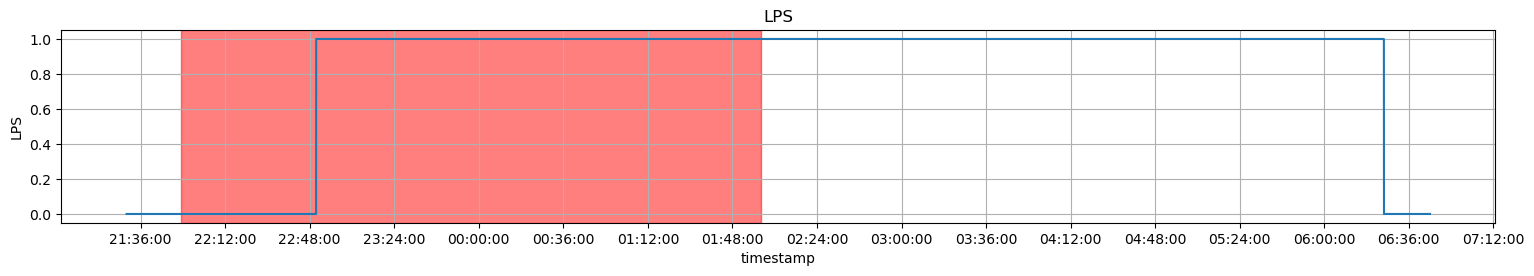

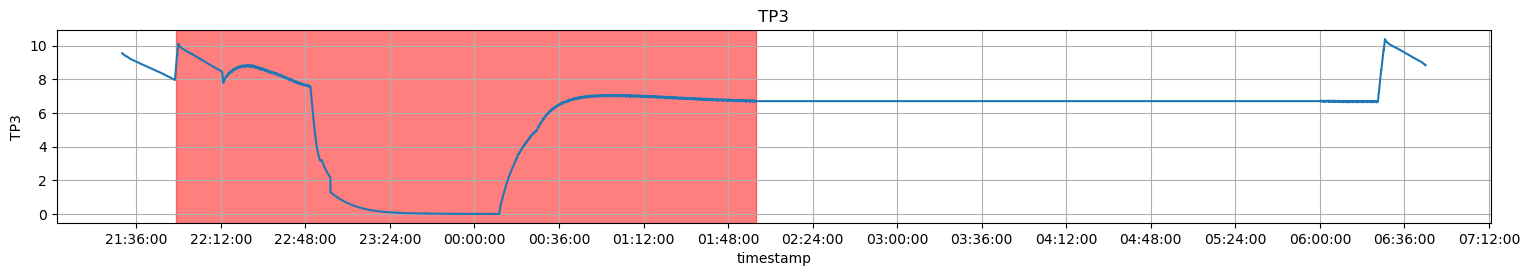

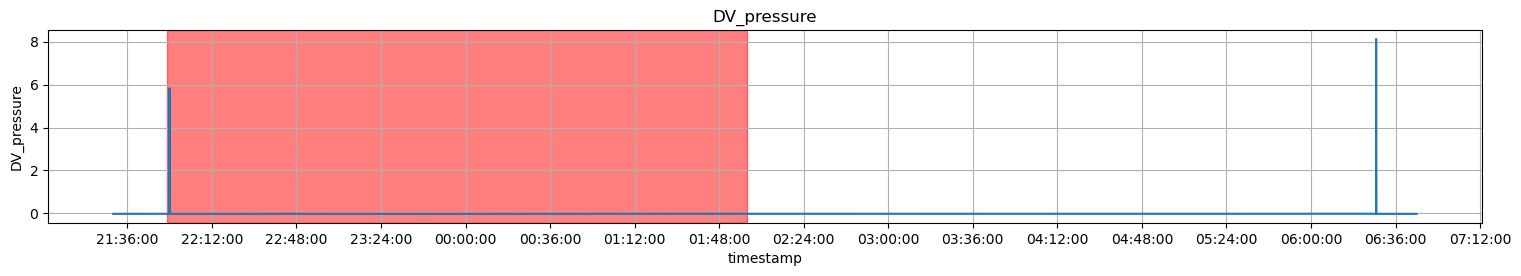

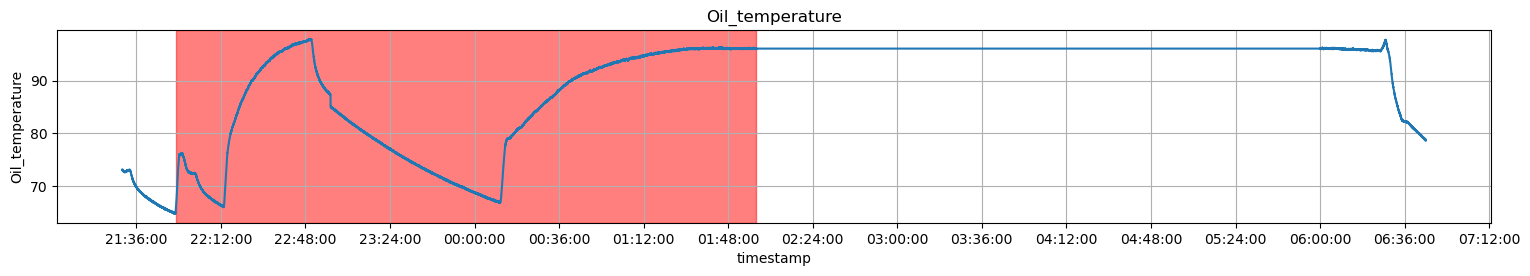

In [6]:
#Fehler 1
start = dt.datetime(2022,2,28,21,30)
end = dt.datetime(2022,3,1,6,45)
# err_1_start = dt.datetime(2022,2,28,22,12)
# err_1_end = dt.datetime(2022,3,1,6,27)

plot_df_matplotlib(df, start, end, 'LPS', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'TP3', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_1_start, err_1_end)

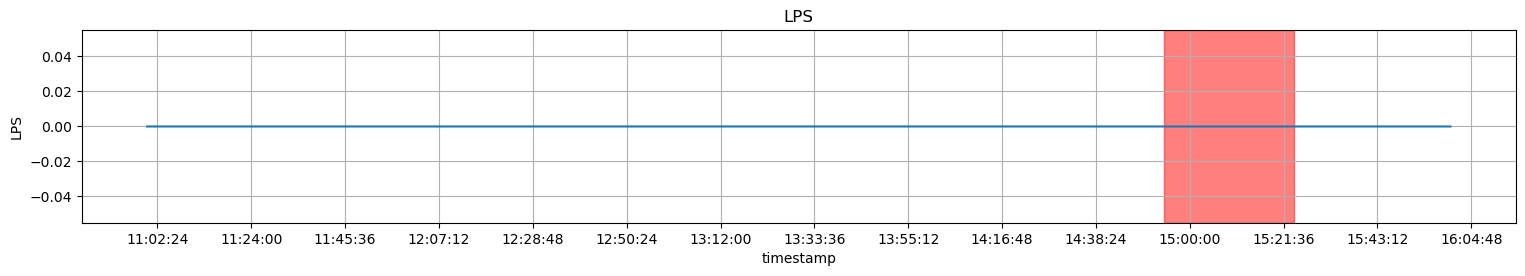

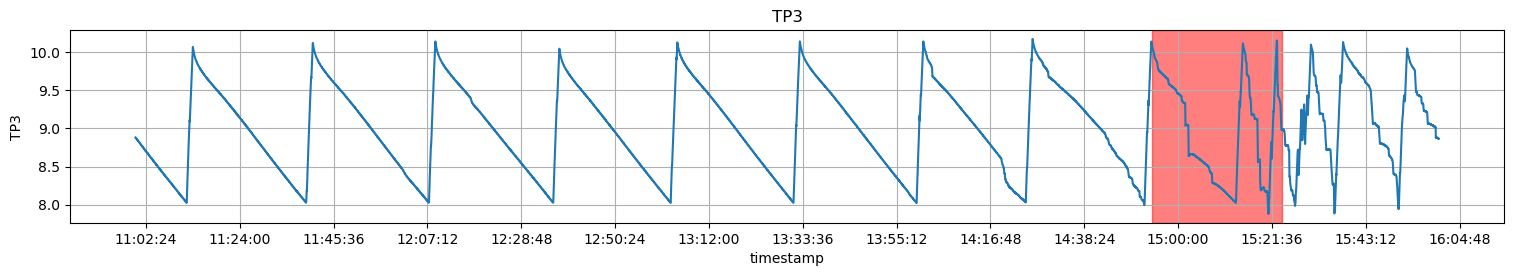

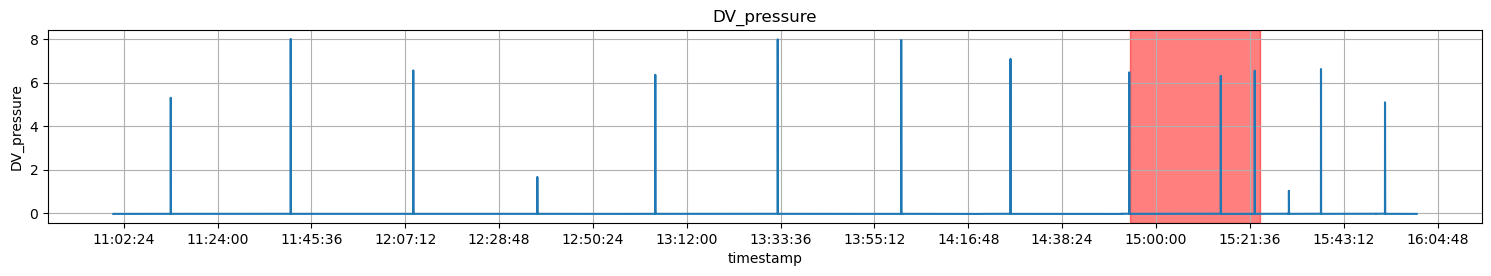

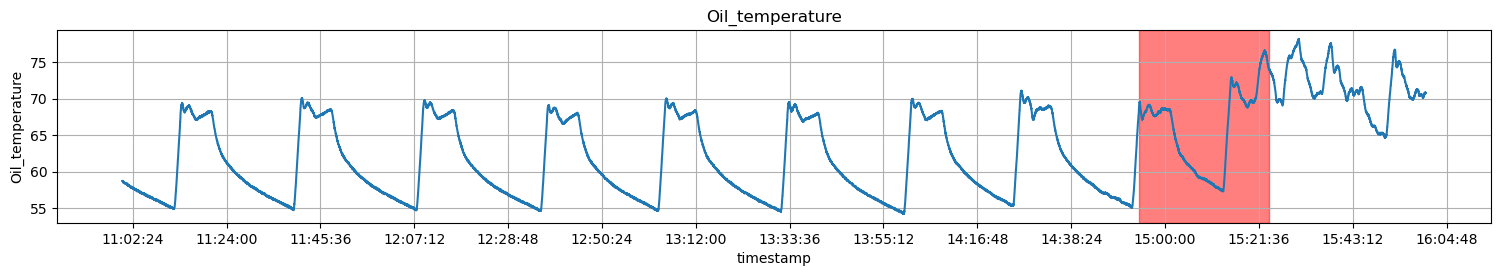

In [7]:
#Fehler 2
start = dt.datetime(2022,3,23,11,00)
end = dt.datetime(2022,3,23,16,00)
# err_2_start = dt.datetime(2022,3,24,11,15)
# err_2_end = dt.datetime(2022,3,24,15,8)


plot_df_matplotlib(df, start, end, 'LPS', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'TP3', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_2_start, err_2_end)

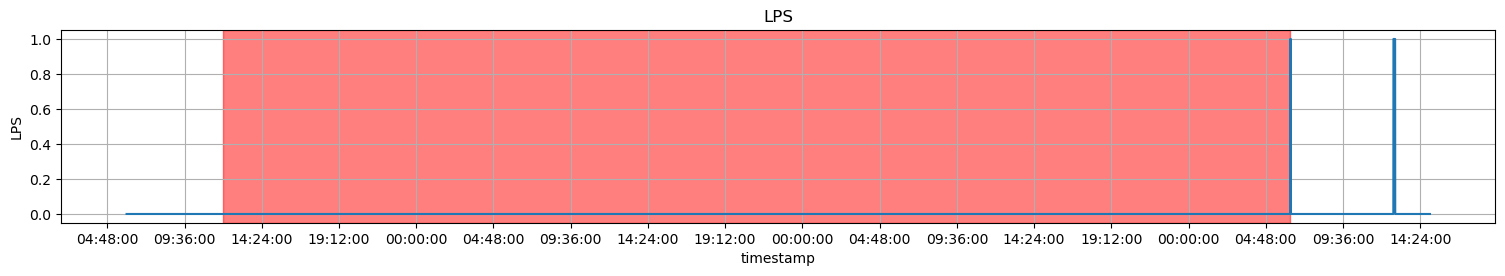

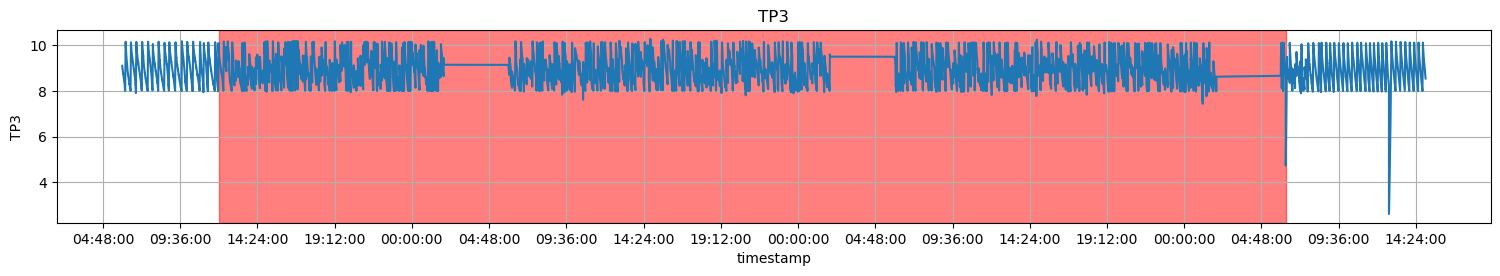

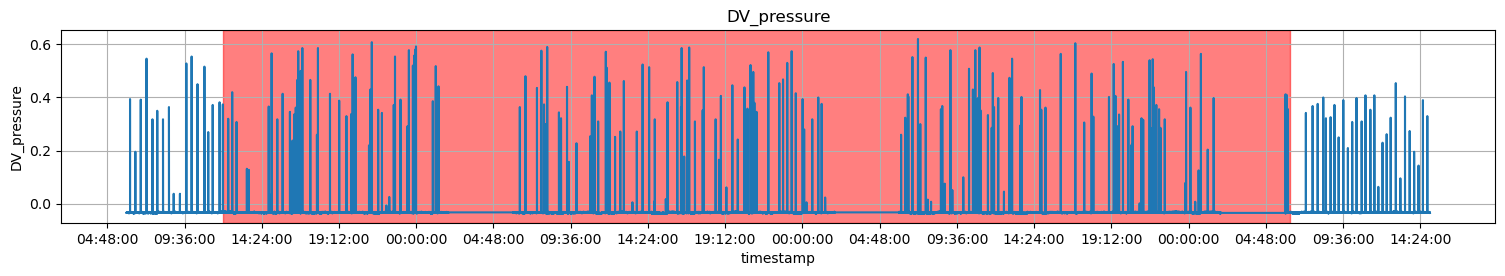

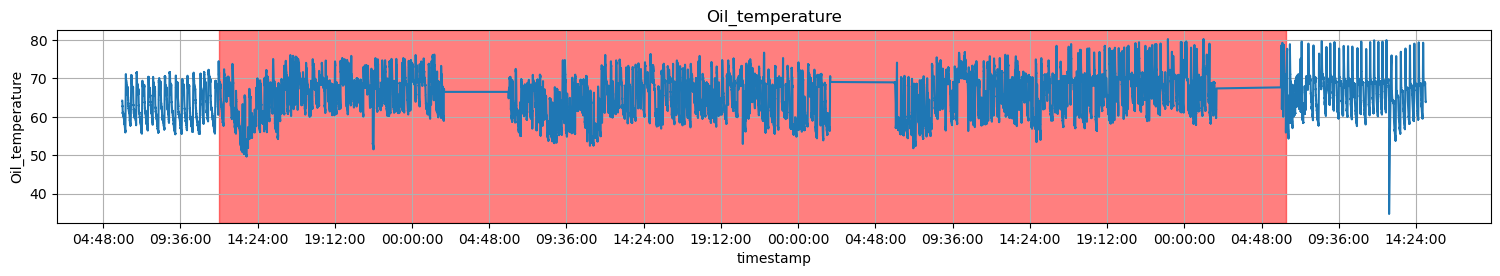

In [8]:
#Fehler 3
start = dt.datetime(2022,5,30,4,00)
end = dt.datetime(2022,6,2,15,00)
# err_3_start = dt.datetime(2022,5,30,12,17)
# err_3_end = dt.datetime(2022,6,2,7,40)

plot_df_matplotlib(df, start, end, 'LPS', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'TP3', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_3_start, err_3_end)


### Zeiterfassung der Störungsfälle (für eigene Labels)
**Fall 1:**
- 28.2-1.03: 22:12:00 - 6:27:00

**Fall 2:**
- 24.03: 11:15:00 - 15:08:00

**Fall 3:**
- 30.05-02.06: 04:00:00 - 07:40:00 



In [9]:
#Add another column to the dataframe that is called Label is 1 on all rows where the timestamp is between err_1_start and err_1_end or err_2_start and err_2_end or err_3_start and err_3_end and 0 otherwise
df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) | 
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0


In [10]:
# a function that plots every column in a dataframe in a single plot using matplotlib in subplots
def plot_df_all_columns(df, start, end):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a matplotlib figure
    fig, axs = plt.subplots(df_plot.columns.size, 1, figsize=(20, 40))

    i = 0
    for col in df_plot.columns:
        axs[i].plot(df_plot['timestamp'], df_plot[col])
        axs[i].set(xlabel='timestamp', ylabel=col, title=col)
        #display 20 x-axis labels
        axs[i].xaxis.set_major_locator(plt.MaxNLocator(20))
        axs[i].grid()
        formatter = DateFormatter('%H:%M:%S')
        fig1 = plt.gcf()
        fig1.axes[0].xaxis.set_major_formatter(formatter)
        i = i + 1

    fig.tight_layout()
    plt.show()

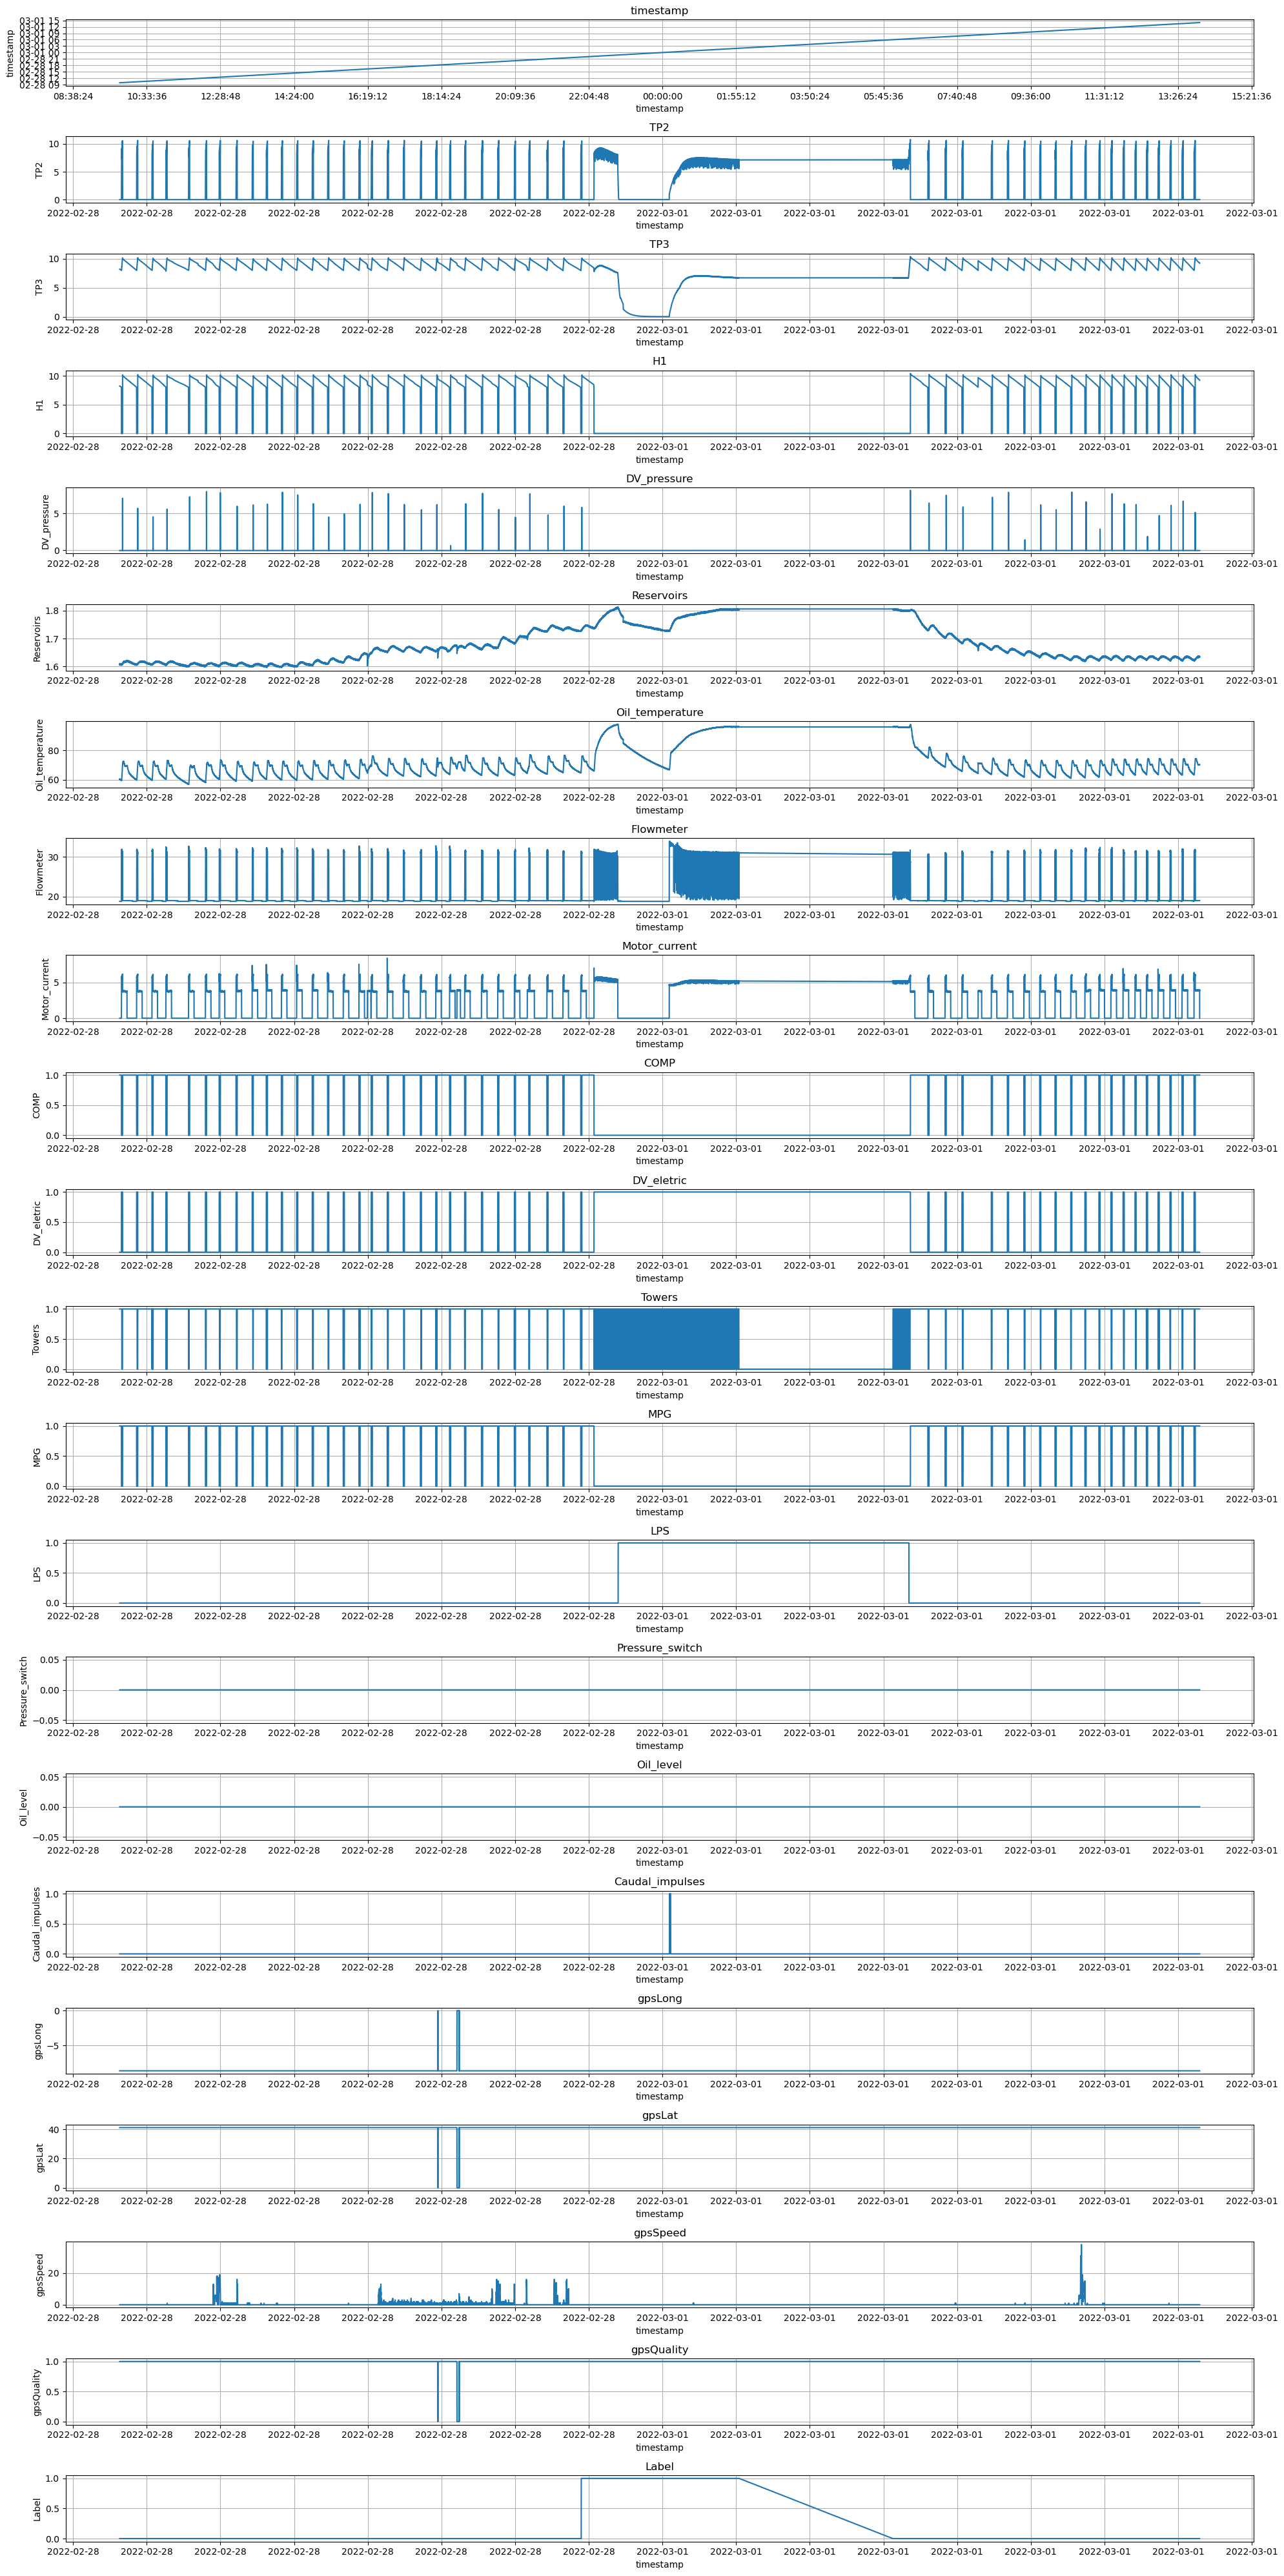

In [11]:
s = err_1_start - dt.timedelta(hours=3*4, seconds=100)
e = err_1_end   + dt.timedelta(hours=3*4)
plot_df_all_columns(df, s, e)

In [12]:
#Klassifizierung mit Decision Tree
class DecisionTreeBinaryClassifier:
    def __init__(self, test_size=0.3, random_state=42, max_depth=7, min_samples_leaf=10, columns=[]):
        #set parameters
        self.test_size = test_size
        self.random_state = random_state
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.columns = columns
        self.model = DecisionTreeClassifier(max_depth = self.max_depth, min_samples_leaf = self.min_samples_leaf)

    def fit(self, df, label):
        #split data into train and test
        train_n, test_n = train_test_split(df, test_size=self.test_size, random_state=self.random_state)
        #split train and test into X and y
        y_train = train_n[label]
        y_test  = test_n[label]
        #drop label from X
        X_train = train_n.drop([label],axis=1)
        X_test = test_n.drop([label],axis=1)
        #keep only columns that are in self.columns
        X_train = X_train[self.columns]
        X_test = X_test[self.columns]
        #save X and y for later use
        self.X_test, self.X_train = X_test, X_train
        self.y_test, self.y_train = y_test, y_train
        #fit model
        self.model.fit(X_train, y_train)

    def score(self):
        #return accuracy score
        return self.model.score(self.X_test, self.y_test)

    def predict(self):
        #return prediction
        return self.model.predict(self.X_test)


    def confusionMatrix(self):
        y_pred = self.predict()
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.model.classes_)
        return disp.plot()

    def corellationMatrix(self):
        corr = self.X_train.corr()
        return sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns)
    
    def decisionTreeGraph(self):
        dot_data = tree.export_graphviz(self.model, out_file=None) 
        dot_data = tree.export_graphviz(self.model, out_file=None, 
                            feature_names=self.X_train.columns,  
                            class_names=['0','1'],  
                            filled=True, rounded=True,  
                            special_characters=True) 
        graph = graphviz.Source(dot_data)
        return graph

 


In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math



In [50]:




class MetroBinaryClassifier:



    def __init__(self, use_shortened: False, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=7, min_samples_leaf=10, excluded_columns=[]):
        self.n_components = n_components
        self.windowSize = window_size
        self.test_size = test_size
        self.random_state = random_state
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.excluded_columns = excluded_columns
        self.use_shortened = use_shortened

        self.scaler = None
        self.pca = None

        self.feature_columns = None

        #Dataset:
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

        #classifiers
        self.decision_tree = None
        self.random_forest = None
        self.linear_regression = None
        self.linear_SVM = None
        self.naive_bayes = None
        self.linear_discriminant_analysis = None

        #regressions
        self.polyreg_scaled = None

    def sliding_window(self, data: DataFrame, window_size = 60, excluded_columns = ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality']):
        """
        Creates a sliding window of size window_size for each column in data.
        Performs the following operations on each column:
        - mean
        - std
        - min
        - max

        Parameters
        ----------
        data : DataFrame
            The DataFrame that should be transformed.

        window_size : int, optional
            The size of the sliding window. The default is 60.

        excluded_columns : list, optional
            A list of columns that should be excluded from the sliding window. The default is ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'].

        Returns
        -------
        df_rolling : DataFrame
            The transformed DataFrame.
        """
        columns = data.columns
        columns  = [x for x in columns if x not in excluded_columns]
        operations = ['mean', 'std', 'min', 'max']

        #generate a dict, where the keys are the column names and the values are the operations that should be performed on the column
        operations_dict = {}
        for column in columns:
            operations_dict[column] = operations
            #keep the labels
            #operations_dict['Label'] = ['max']

        df_rolling = data.rolling(window_size).agg(operations_dict)

        #drop all columns that have NaN values
        df_rolling = df_rolling.dropna()

        #flatten df_rolling
        df_rolling.columns = ['_'.join(col) for col in df_rolling.columns]

        #keep original LabelValues
        df_rolling['Label'] = data['Label']

        #rename Label_min to Label
        #df_rolling = df_rolling.rename(columns={'Label_max': 'Label'})
        return df_rolling
    
    def scale(self, train, test):
        """
        Scale the data using StandardScaler
        Fits the scaler on the training data and transforms the training and test data.

        Parameters
        ----------
        train : DataFrame
            The training data.

        test : DataFrame
            The test data.

        Returns
        -------
        train_rescaled : DataFrame
            The rescaled training data.
        """
        self.scaler = StandardScaler()
        train_rescaled = self.scaler.fit_transform(train)
        test_rescaled = self.scaler.transform(test)

        return train_rescaled, test_rescaled
    
    def performPca(self, train, test):
        """
        Perform PCA on the data.
        Fits the PCA on the training data and transforms the training and test data.
        This is done to reduce the dimensionality of the data.
        This will slightly reduce the accuracy of the model, but will increase the speed of the model.
        Uses the n_components parameter given by in the constructor of the class to determine the number of components.
        (if a float is given, the number of components is determined by the explained variance)

        Parameters
        ----------
        train : DataFrame
            The training data.

        test : DataFrame
            The test data.

        Returns
        -------
        train_pca : DataFrame
            The PCA transformed training data.
        """
        self.pca = PCA(n_components=self.n_components,random_state=self.random_state)
        train_pca = self.pca.fit_transform(train)
        test_pca = self.pca.transform(test)

        return train_pca, test_pca

    
    def prepareData(self, dataFrame, do_scale=True, do_pca=True):
        """
        Prepare the data for the model.
        This includes(if desired):
        - sliding window
        - scaling
        - PCA

        Parameters
        ----------
        dataFrame : DataFrame
            The DataFrame that should be prepared.

        do_scale : bool, optional
            Whether the data should be scaled. The default is True.

        do_pca : bool, optional
            Whether PCA should be performed on the data. The default is True.

        Returns
        -------
        X_train : DataFrame
            The training data.

        X_test : DataFrame
            The test data.

        y_train : DataFrame
            The training labels.

        y_test : DataFrame
            The test labels.
        """

        data = dataFrame

        if(self.use_shortened):
            data = self.shorten(dataFrame)

        data_rolling = self.sliding_window(data, window_size=self.windowSize, excluded_columns=self.excluded_columns)

        y = data_rolling['Label']
        #y = data_rolling.loc[:, 'Label']

        data_rolling.drop(['Label'], axis=1, inplace=True)

        X = data_rolling

        self.feature_columns = X.columns

        print(self.feature_columns)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state, stratify=y)

        
        if(do_scale):
            X_train, X_test = self.scale(X_train, X_test)

        if(do_pca):
            X_train, X_test = self.performPca(X_train, X_test)

        self.X_train, self.X_test = X_train, X_test
        self.y_train, self.y_test = y_train, y_test

        return X_train, X_test, y_train, y_test
    
    def evalModels(self):
        """
        Evaluate the models.
        Prints a Plotly interactive Bar chart for each fitted model that shows the precision, recall and f1 score for each class(only '1' and '0').
        """

        calssifiers = [self.decision_tree, self.random_forest, self.linear_regression, self.linear_SVM, self.naive_bayes, self.linear_discriminant_analysis]


        results = []
        clfs = []
        # precison = {
        #     '0': [],
        #     '1': []
        # }
        # recall = {
        #     '0': [],
        #     '1': []
        # }
        # f1_score = {
        #     '0': [],
        #     '1': []
        # }

        precison = {}
        recall = {}
        f1_score = {}


        for label in self.y_test.unique():
            precison[str(label)] = []
            recall  [str(label)] = []
            f1_score[str(label)] = []


        for classifier in calssifiers:
            if(classifier is not None):
                y_true, y_pred = self.y_test, classifier.predict(self.X_test)
                evaluation = classification_report(y_true, y_pred, output_dict=True)

                clfs.append(classifier.__class__.__name__)
                    
                for label in self.y_test.unique():

                    precison[str(label)].append(evaluation[str(label)]['precision'])
                    recall  [str(label)].append(evaluation[str(label)]['recall'])
                    f1_score[str(label)].append(evaluation[str(label)]['f1-score'])

        print(precison, recall, f1_score)

        print(results)
        #make a plot with plotly, where on the x axis are  the classifiers, each classifier has bar for classes precison, recall and f1-score

        data = []

        for label in self.y_test.unique():
            data.append(go.Bar(name ='[' + str(label) + '] precision',    x=clfs, y=precison[str(label)] ,text=precison[str(label)] ,textposition='auto',))
            data.append(go.Bar(name ='[' + str(label) + '] recall',       x=clfs, y=recall[str(label)]   ,text=recall[str(label)]   ,textposition='auto',))
            data.append(go.Bar(name ='[' + str(label) + '] f1-score',     x=clfs, y=f1_score[str(label)] ,text=f1_score[str(label)] ,textposition='auto',))

        fig = go.Figure(data=data)
        # Change the bar mode
        fig.update_layout(barmode='group')
        fig.show()


    def ConfusionMatricesis(self):
        """
        Shows a plotly interactive confusion matrix for each fitted model.
        """

        calssifiers = [self.decision_tree, self.random_forest, self.linear_regression, self.linear_SVM, self.naive_bayes, self.linear_discriminant_analysis]

        #list of all classifiers that are not None
        clfs = [clf for clf in calssifiers if clf is not None]
        y_true = self.y_test
        cmats = []
        
        #get the confusion matrix for each classifier
        for clf in clfs:
            y_pred = clf.predict(self.X_test)
            cmats.append(confusion_matrix(y_true, y_pred)) 
            
        #Titles for each matrix is the class name of the classifier
        titles = [clf.__class__.__name__ for clf in clfs]

        #Calculate the optimal grid size for the plot
        n = len(clfs)
        rows = int(math.sqrt(n))
        cols = int(math.ceil(n / rows))
        
        #plotgird for the confusion matrices
        fig = make_subplots(rows=rows, cols=cols,
                        subplot_titles=(titles))

        
        #add the confusion matrices to the plot
        r=1
        c=1
        for i in range(len(clfs)):
            heatmap = go.Heatmap(
                z=cmats[i],
                text=cmats[i],
                texttemplate="%{text}",
                textfont={"size": 10},)            

            fig.add_trace(heatmap,row=r,col=c)
            
            #fill the grid from left to right, top to bottom
            if(c<cols):
                c=c+1
            else:
                r=r+1
                c=1
        fig.show()


    def fitDecisionTree(self):
        self.decision_tree = DecisionTreeClassifier()
        self.decision_tree.fit(self.X_train, self.y_train)
    
    def decisionTreeConfusionMatrix(self):
        y_pred = self.decision_tree.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.decision_tree.classes_)
        return disp.plot()
    
    def decisionTreeGraph(self):
        dot_data = tree.export_graphviz(self.decision_tree, out_file=None) 
        dot_data = tree.export_graphviz(self.decision_tree, out_file=None, 
                            feature_names=self.X_train.columns,  
                            class_names=['0','1'],  
                            filled=True, rounded=True,  
                            special_characters=True) 

        graph = graphviz.Source(dot_data)
        return graph
    
    def fitRandomForest(self):
        self.random_forest = RandomForestClassifier(n_estimators=10)
        self.random_forest.fit(self.X_train, self.y_train)
    
    def randomForestConfusionMatrix(self):
        y_pred = self.random_forest.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.random_forest.classes_)
        return disp.plot()
    
    def fitLinearRegression(self):
        self.linear_regression = LinearRegression(n_jobs=-1)
        self.linear_regression.fit(self.X_train, self.y_train)
    
    def linearRegressionConfusionMatrix(self):
        y_pred = self.linear_regression.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.linear_regression.classes_)
        return disp.plot()
    
    def fitLinearSVM(self):
        self.linear_SVM = LinearSVC()
        self.linear_SVM.fit(self.X_train, self.y_train)
    
    def fitNaiveBayes(self):
        self.naive_bayes = GaussianNB(var_smoothing=1e-15,)
        self.naive_bayes.fit(self.X_train, self.y_train)
    
    def naiveBayesConfusionMatrix(self):
        y_pred = self.naive_bayes.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.naive_bayes.classes_)
        return disp.plot()
    
    def fitLinearDiscriminantAnalysis(self):
        self.linear_discriminant_analysis = LinearDiscriminantAnalysis()
        self.linear_discriminant_analysis.fit(self.X_train, self.y_train)
    
    def linearDiscriminantAnalysisConfusionMatrix(self):
        y_pred = self.linear_discriminant_analysis.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.linear_discriminant_analysis.classes_)
        return disp.plot()
    
    def linearDiscriminantAnalysisFindSolver(self):
        # define model
        model = LinearDiscriminantAnalysis()
        # define model evaluation method
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        # define grid
        grid = dict()
        grid['solver'] = ['svd', 'lsqr', 'eigen']
        # define search
        search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
        # perform the search
        results = search.fit(self.X_train, self.y_train)
        # summarize
        print('Mean Accuracy: %.3f' % results.best_score_)
        print('Config: %s' % results.best_params_)
    
    def linearSVMConfusionMatrix(self):
        y_pred = self.linear_SVM.predict(self.X_test)
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.linear_SVM.classes_)
        return disp.plot()

    def fitPlynomialRegression(self,degree=9):
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import PolynomialFeatures

        scaler = StandardScaler()
        self.polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
        self.polyreg_scaled.fit(self.X_train,self.y_train)

    def polyregScore(self):
        return self.polyreg_scaled.score(self.X_test, self.y_test)    
        
    def shorten(self, df):
        """
        Shorten the dataframe around the failures. This should be done to test effects of changes on the models, but shpouldnt be done for the final model.
        """
        dfMin = df.copy()
        #drop vor Fail 1
        dfMin.drop(dfMin[dfMin['timestamp'] < '2022-02-26 23:00:00'].index,inplace=True)

        #drop zwischen Fail1 und Fail2
        dfMin.drop(dfMin[(dfMin['timestamp'] > '2022-03-03 00:00:00') & (dfMin['timestamp'] <= '2022-03-21 00:00:00')].index,inplace=True)

        #drop zwischen Fail 2 und Fail 3
        dfMin.drop(dfMin[(dfMin['timestamp'] > '2022-03-25 00:00:00') & (dfMin['timestamp'] <= '2022-05-28 00:00:00')].index,inplace=True)

        dfMin['Label'].value_counts()
        
        return dfMin



In [51]:
mb = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
print("Prepareing Data...")
_, _, _, _ = mb.prepareData(df, do_scale=True, do_pca=False)

Prepareing Data...
Index(['TP2_mean', 'TP2_std', 'TP2_min', 'TP2_max', 'TP3_mean', 'TP3_std',
       'TP3_min', 'TP3_max', 'H1_mean', 'H1_std', 'H1_min', 'H1_max',
       'DV_pressure_mean', 'DV_pressure_std', 'DV_pressure_min',
       'DV_pressure_max', 'Reservoirs_mean', 'Reservoirs_std',
       'Reservoirs_min', 'Reservoirs_max', 'Oil_temperature_mean',
       'Oil_temperature_std', 'Oil_temperature_min', 'Oil_temperature_max',
       'Flowmeter_mean', 'Flowmeter_std', 'Flowmeter_min', 'Flowmeter_max',
       'Motor_current_mean', 'Motor_current_std', 'Motor_current_min',
       'Motor_current_max', 'COMP_mean', 'COMP_std', 'COMP_min', 'COMP_max',
       'DV_eletric_mean', 'DV_eletric_std', 'DV_eletric_min', 'DV_eletric_max',
       'Towers_mean', 'Towers_std', 'Towers_min', 'Towers_max', 'MPG_mean',
       'MPG_std', 'MPG_min', 'MPG_max', 'LPS_mean', 'LPS_std', 'LPS_min',
       'LPS_max', 'Pressure_switch_mean', 'Pressure_switch_std',
       'Pressure_switch_min', 'Pressure_switch

In [52]:
print("Fitting Decision Tree...")
mb.fitDecisionTree()
print("Fitting Random Forest...")
mb.fitRandomForest()
print("Fitting Linear Regression...")
mb.fitLinearDiscriminantAnalysis()
print("Fitting Naive Bayes...")
mb.fitNaiveBayes()

Fitting Decision Tree...
Fitting Random Forest...
Fitting Linear Regression...
Fitting Naive Bayes...


In [53]:
mb.evalModels()

{'1': [0.9926206244087039, 0.9997945670896478, 0.445220371196959, 0.7035187550807107], '0': [0.9980872804147581, 0.9995335564945399, 0.9893187934710426, 0.9054312522555035]} {'1': [0.9934038188417232, 0.9983904055546788, 0.9758876439955815, 0.6691810004734101], '0': [0.9978589760598755, 0.9999405271127744, 0.6474630238760768, 0.9182430794146038]} {'1': [0.9930120671977286, 0.9990919929570237, 0.6114736592311344, 0.6859204024359669], '0': [0.997973115180132, 0.9997370003864953, 0.7826911697203311, 0.9117921624832204]}
[]


In [54]:
mb.ConfusionMatricesis()

In [ ]:
#all but the excluded columns
excluded = ['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality']
columns = [c for c in df.columns if c not in excluded]

Welche Features sind besonders Aussagekräftig?

C:\Users\Johannes\AppData\Local\Temp\ipykernel_25124\3558408640.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



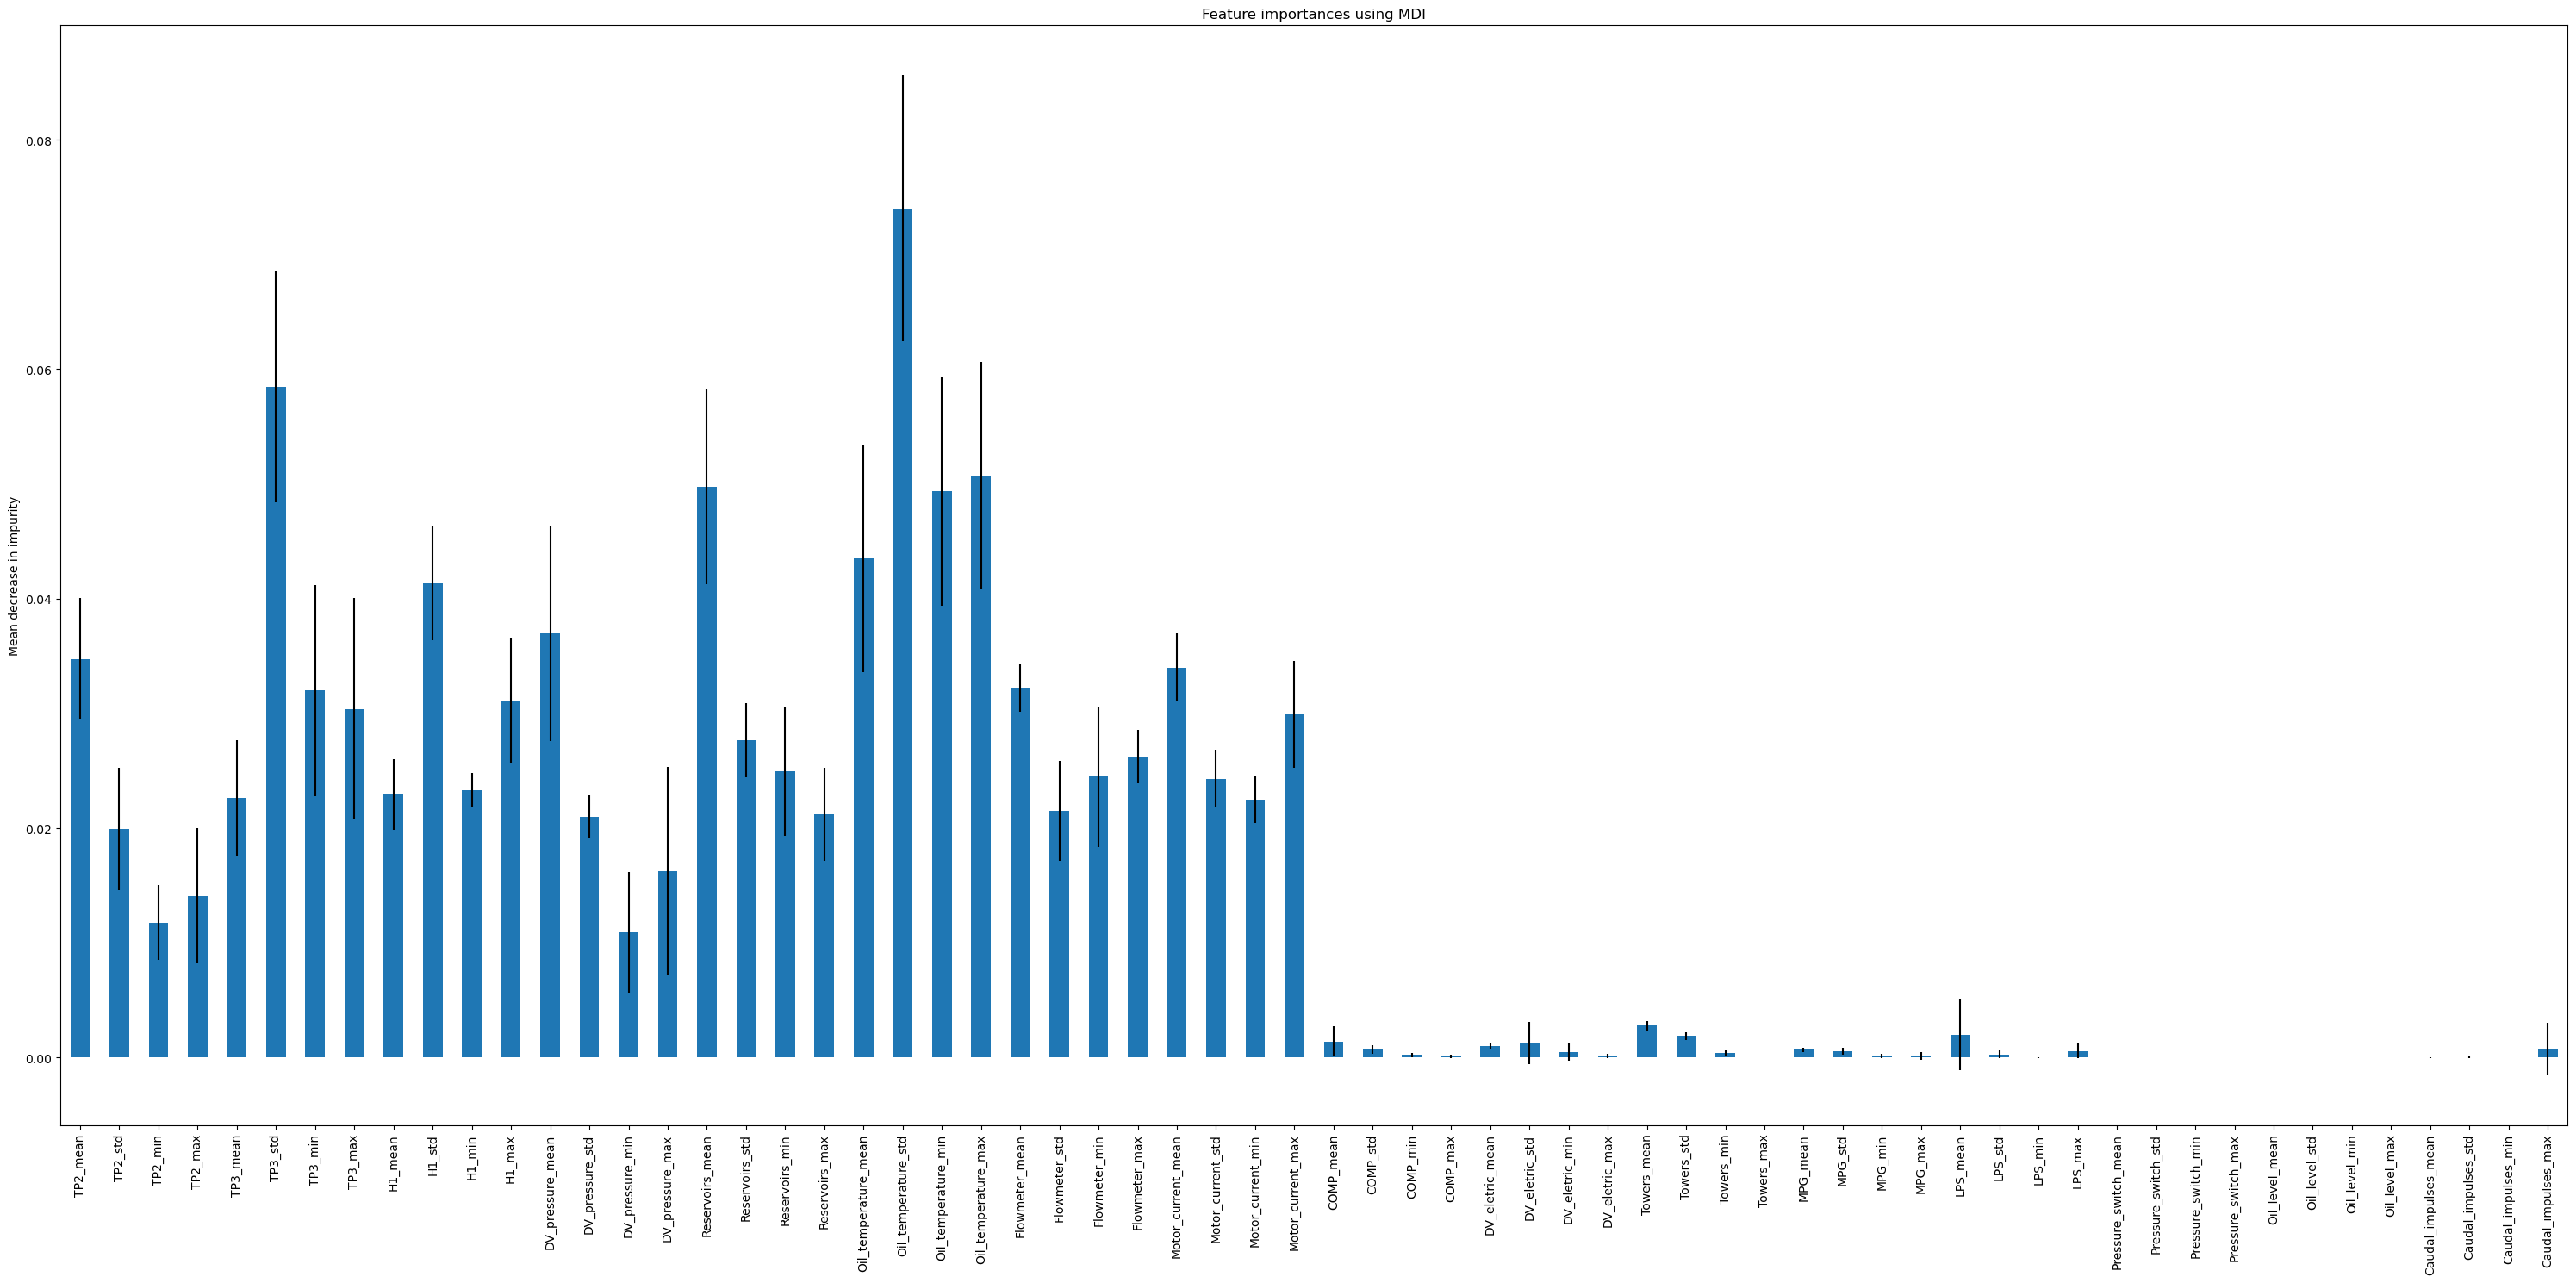

In [ ]:
importances = mb.random_forest.feature_importances_
forest = mb.random_forest
forest_importances = pd.Series(importances, index=mb.feature_columns)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.rcParams["figure.figsize"] = (30,15)
fig.tight_layout()
fig.show()

In [ ]:
# #find best parameters for max_depth and min_samples_leaf on a range from 3 to 30 for best accuracy

# best_accuracy = 0
# best_params = (0, 0)

# #column of the label
# label = 'Label'
# #only keep columns: TP3, LPS, DV_pressure, Oil_temperature
# columns = ['TP3', 'LPS', 'DV_pressure', 'Oil_temperature']

# for max_depth in range(3,15):
#     for min_samples_leaf in range(3,12):
#         clf = DecisionTreeBinaryClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, columns=columns)
#         clf.fit(df=df, label=label)
#         accuracy = clf.score()
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params = (max_depth, min_samples_leaf)

# print("Best max_depth:", best_params[0])
# print("Best min_samples_leaf:", best_params[1])
# print("Best accuracy:", best_accuracy)

### Aufgabe 2 (Vorhersage des Eintretens von Störungen)
Erstellen Sie nun Klassifikationsmodelle, um anhand der gegebenen Sensormessdaten vorherzusagen, ob innerhalb eines bestimmten Zeitraums (z.B. 1 Stunde, 2 Stunden etc.) eine Storung der APU auftreten wird. Laut Betreiber ware es wünschenswert, mindestens zwei Stunden im Voraus eine Storung vorhersagen zu können, um rechtzeitig Maßnahmen einzuleiten, vgl. [1]. Testen Sie verschiedene Prognosezeitraume und stellen Sie die resultierenden Modelle gegen über.

In [ ]:
# IDEE:
# Datensatz shiften um ein gewisses Window, labels aber gleich behalten

In [ ]:
# A single step is 1s 
shiff_steps = 60*60*48 # 1a011
pd.options.display.max_columns = None

# Create a new dataframe, that has a extra column foreach column with the vlaue of the original column shifted by "shiff_steps" steps
df_shifted = pd.DataFrame()
for column in df.columns:
    if column != 'Label' or column != 'timestamp':
        df_shifted[column] = df[column].shift(shiff_steps)
        #df_shifted[column+"(t)"] = df[column]

    if(column == 'Label' or column == 'timestamp'):
        df_shifted[column] = df[column]

#drop nan rows
df_shifted.dropna(inplace=True)

df_shifted

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
172800,2022-01-03 13:59:58,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172801,2022-01-03 13:59:59,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172802,2022-01-03 14:00:00,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172803,2022-01-03 14:00:01,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172804,2022-01-03 14:00:02,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773583,2022-06-02 15:49:49,-0.008,8.874,8.718,-0.034,1.464,65.650,19.199125,0.0025,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
10773584,2022-06-02 15:49:50,-0.010,8.872,8.714,-0.034,1.462,65.425,19.189781,0.0025,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
10773585,2022-06-02 15:49:51,-0.006,8.872,8.716,-0.034,1.464,65.425,19.189781,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
10773586,2022-06-02 15:49:52,-0.008,8.868,8.712,-0.034,1.462,65.500,19.199125,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0


In [ ]:
pd.set_option('display.max_rows', 1000)

#show the shifted_data around the second failure with a buffer of 3 hours before and after
df_shifted[(df_shifted['timestamp'] > '2022-03-23 15:00:00') & (df_shifted['timestamp'] <= '2022-03-25 17:00:00')]

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
5706258,2022-03-23 15:00:01,-0.008,8.448,8.452,-0.028,1.592,57.900,18.844062,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.68532,41.1882,0.0,1.0,1
5706259,2022-03-23 15:00:02,-0.010,8.448,8.450,-0.030,1.592,58.025,18.844062,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.68532,41.1882,0.0,1.0,1
5706260,2022-03-23 15:00:03,-0.010,8.448,8.452,-0.028,1.592,57.950,18.853406,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.68532,41.1882,0.0,1.0,1
5706261,2022-03-23 15:00:04,-0.010,8.448,8.450,-0.030,1.592,57.850,18.853406,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.68532,41.1882,0.0,1.0,1
5706262,2022-03-23 15:00:05,-0.008,8.444,8.448,-0.030,1.592,57.950,18.853406,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.68532,41.1882,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815160,2022-03-25 16:59:56,-0.004,9.382,9.390,-0.026,1.668,71.650,19.030938,3.7800,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
5815161,2022-03-25 16:59:57,-0.006,9.380,9.390,-0.028,1.666,71.650,19.030938,3.6950,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
5815162,2022-03-25 16:59:58,-0.006,9.380,9.388,-0.028,1.666,71.650,19.030938,3.6875,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
5815163,2022-03-25 16:59:59,-0.004,9.380,9.388,-0.026,1.668,71.725,19.030938,3.7625,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0


In [ ]:
df_shifted

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
172800,2022-01-03 13:59:58,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172801,2022-01-03 13:59:59,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172802,2022-01-03 14:00:00,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172803,2022-01-03 14:00:01,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
172804,2022-01-03 14:00:02,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-8.65934,41.2124,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773583,2022-06-02 15:49:49,-0.008,8.874,8.718,-0.034,1.464,65.650,19.199125,0.0025,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
10773584,2022-06-02 15:49:50,-0.010,8.872,8.714,-0.034,1.462,65.425,19.189781,0.0025,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
10773585,2022-06-02 15:49:51,-0.006,8.872,8.716,-0.034,1.464,65.425,19.189781,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0
10773586,2022-06-02 15:49:52,-0.008,8.868,8.712,-0.034,1.462,65.500,19.199125,0.0050,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0


In [ ]:
futureBinaryClassifier = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
futureBinaryClassifier.prepareData(df_shifted, do_scale=False, do_pca=False)

(          TP2_mean   TP2_std  TP2_min  TP2_max  TP3_mean   TP3_std  TP3_min  \
 4153657  -0.009600  0.000960   -0.012   -0.008  8.129667  0.015899    8.102   
 5759570  -0.006167  0.001122   -0.008   -0.004  9.613267  0.014697    9.592   
 10712251 -0.009433  0.001332   -0.012   -0.008  8.142233  0.016689    8.104   
 4309297  -0.004333  0.000986   -0.006   -0.002  8.270700  0.036527    8.248   
 4258632  -0.006933  0.001247   -0.010   -0.004  8.262167  0.010826    8.244   
 ...            ...       ...      ...      ...       ...       ...      ...   
 10716105 -0.007533  0.001065   -0.010   -0.006  9.239400  0.033554    9.196   
 4244576   9.787167  0.619504    7.068   10.534  9.391433  0.417284    8.722   
 4210213  -0.003567  0.001047   -0.006   -0.002  9.635833  0.012330    9.616   
 5666938  -0.011133  0.003000   -0.018   -0.006  9.846600  0.057923    9.758   
 5536820  -0.009733  0.001006   -0.012   -0.008  9.752200  0.043001    9.680   
 
           TP3_max   H1_mean    H1_std

In [ ]:
futureBinaryClassifier.fitRandomForest()

0.9994573640661519


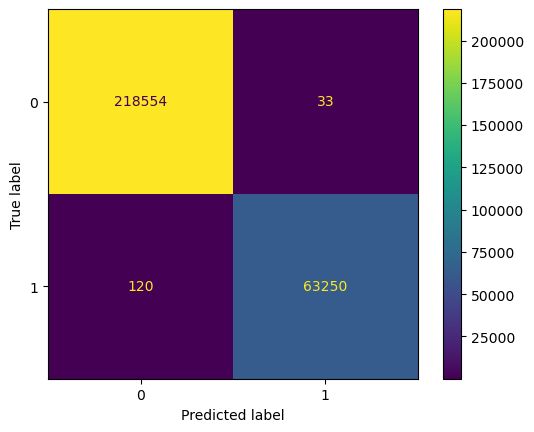

In [ ]:
print(futureBinaryClassifier.randomForestScore())
futureBinaryClassifier.randomForestConfusionMatrix()


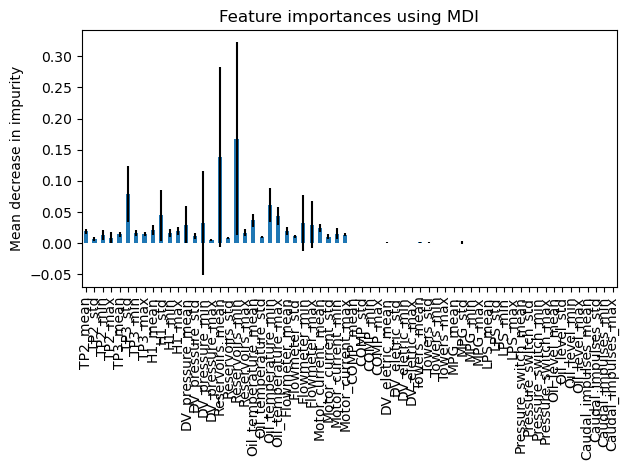

In [ ]:
importances = futureBinaryClassifier.random_forest.feature_importances_
forest = futureBinaryClassifier.random_forest
forest_importances = pd.Series(importances, index=forest.feature_names_in_)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
m = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])

#X_train, X_test, y_train, y_test = m.prepareData(df_shifted)

### Aufgabe 3 (Vorhersage der Dauer von Störungen)
Entwickeln Sie Prognosemodelle zur Vorhersage der Storungsdauer und beurteilen Sie auf geeignete Weise deren Gute sowie deren Eignung für den Einsatz in der Praxis. Sofern diese aus Ihrer Sicht nicht ausreichend ist, skizzieren Sie Maßnahmen, durch die die Gute verbessert werden konnte.

In [ ]:
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)

In [ ]:
#Methode 1: Labels sind verbleibende Störungszeit

df_remaining = pd.read_csv('dataset_train.csv')
df_remaining['timestamp'] = pd.to_datetime(df_remaining['timestamp'])

#Set Labels. The label is the remaining time until the end of the current failure. if there is no failure, the label is 0

def LabelGeneration(row):
    timestamp = row['timestamp']

    #Fail 1
    if timestamp > err_1_start and timestamp <= err_1_end:
        return (err_1_end - timestamp).total_seconds()

    #Fail 2
    if timestamp > err_2_start and timestamp <= err_2_end:
        return (err_2_end - timestamp).total_seconds()

    #Fail 3
    if timestamp > err_3_start and timestamp <= err_3_end:
        return (err_3_end - timestamp).total_seconds()

    #No Fail
    return 0
    
df_remaining['Label'] = df_remaining.apply(lambda row: LabelGeneration(row), axis=1)

In [ ]:
df_remaining[(df_remaining['timestamp'] > '2022-03-23 15:00:00') & (df_remaining['timestamp'] <= '2022-03-23 15:24:00')]


,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
5706258,2022-03-23 15:00:01,-0.006,9.456,9.458,-0.028,1.588,68.500,19.040281,3.8475,1,0,1,1,0,0,0,0,-8.69291,41.1853,21,1,1439.0
5706259,2022-03-23 15:00:02,-0.008,9.456,9.458,-0.028,1.590,68.575,19.049625,3.9225,1,0,1,1,0,0,0,0,-8.69296,41.1853,22,1,1438.0
5706260,2022-03-23 15:00:03,-0.006,9.456,9.460,-0.026,1.590,68.575,19.030938,3.8550,1,0,1,1,0,0,0,0,-8.69300,41.1853,22,1,1437.0
5706261,2022-03-23 15:00:04,-0.008,9.454,9.456,-0.028,1.588,68.600,19.030938,3.8025,1,0,1,1,0,0,0,0,-8.69304,41.1854,21,1,1436.0
5706262,2022-03-23 15:00:05,-0.006,9.456,9.456,-0.028,1.590,68.525,19.030938,3.8875,1,0,1,1,0,0,0,0,-8.69308,41.1854,20,1,1435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707693,2022-03-23 15:23:56,-0.010,8.984,8.990,-0.030,1.590,73.950,19.040281,3.8325,1,0,1,1,0,0,0,0,-8.67971,41.1804,17,1,4.0
5707694,2022-03-23 15:23:57,-0.012,8.982,8.990,-0.030,1.590,74.000,19.049625,3.8275,1,0,1,1,0,0,0,0,-8.67966,41.1803,18,1,3.0
5707695,2022-03-23 15:23:58,-0.010,8.984,8.990,-0.028,1.590,73.900,19.040281,3.9100,1,0,1,1,0,0,0,0,-8.67961,41.1803,20,1,2.0
5707696,2022-03-23 15:23:59,-0.010,8.984,8.990,-0.028,1.592,73.900,19.030938,3.8650,1,0,1,1,0,0,0,0,-8.67956,41.1803,19,1,1.0


<AxesSubplot: >

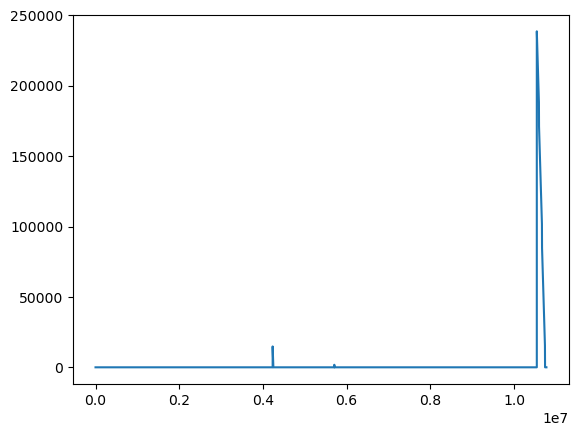

In [ ]:
#plot the labels
df_remaining['Label'].plot()

In [ ]:
c = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
c.prepareData(df_remaining, do_scale=False, do_pca=True)
# c.fitRandomForest()
# print(c.randomForestScore())
# c.randomForestConfusionMatrix()

(array([[17.67598916, 19.64033014,  7.64847349, -3.50549252],
        [-5.10326644, -2.77684687,  1.11229997,  1.89034765],
        [ 5.68611289, -5.62649152, -0.21014467,  1.06054061],
        ...,
        [ 5.10140015, -5.75050732, -1.1425181 , -2.80991719],
        [17.17948061, 19.37564666,  7.28507015, -2.36138167],
        [-1.87331525, -3.83351952,  1.22890516,  2.23866682]]),
 array([[  5.52044345,  -4.96815287,  -0.14148679,   0.0281416 ],
        [  9.090335  ,  -6.34691219,  -0.83153955,  -2.49380686],
        [  0.15371356,  -4.51463519,   1.68021202,   3.03384626],
        ...,
        [ -9.95913944,  -0.95062989,   1.4328579 ,   1.61520584],
        [-16.65547513,   1.33547547,   1.18096733,   0.53859862],
        [  5.65959931,  -5.76982797,  -1.19855028,  -3.09118136]]),
 4153657         0.0
 5759570         0.0
 10712251    41422.0
 4309297         0.0
 4258632         0.0
              ...   
 10716105    37568.0
 4244576      2428.0
 4210213         0.0
 5666938     

In [ ]:
c.fitLinearRegression()

In [ ]:
c.linear_regression.predict(c.X_test)
actual = c.y_test.copy()
#reset the index of the actual values
actual.reset_index(drop=True, inplace=True)
results = pd.DataFrame({'Actual': actual, 'Predicted': c.linear_regression.predict(c.X_test)})
results

,Actual,Predicted
0,19400.0,22384.396582
1,143233.0,25938.476531
2,0.0,17121.733951
3,0.0,34104.457052
4,0.0,20123.974708
...,...,...
281952,0.0,32874.448787
281953,0.0,27730.147368
281954,0.0,25153.988069
281955,0.0,30793.165743


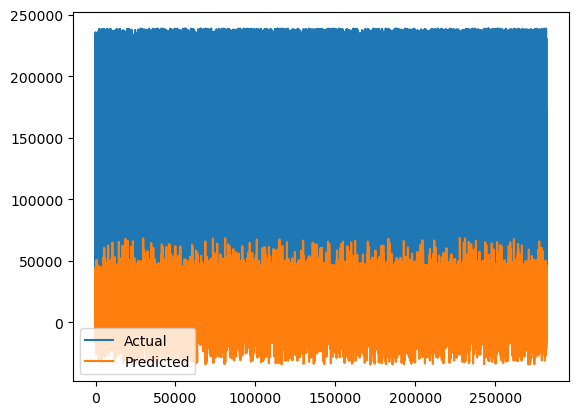

In [ ]:
#plt the acuatl values and the same values in the same diagramm
plt.plot(actual, label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
#set the dimension of the plot so taht the x axis is not to small
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

* degree:  1  score:  0.016736459131068804
* degree:  2  score:  0.10737802942146979
* degree:  3  score:  0.15132775411259902
* degree:  4  score:  0.2028557891968763
* degree:  5  score:  0.2363742270730982
* degree:  6  score:  0.2534498976049867
* degree:  7  score:  0.2744239750665127
* degree:  8  score:  0.28447377870745905
* degree:  9  score:  0.2391308987311287
* degree:  10  score:  -3.9171914332267095
* degree:  11  score:  -6.665693831506913
* degree:  12  score:  -50.20041370882595
* degree:  13  score:  -292.0148401877538

In [ ]:
# #find best accuracy
# for i in range(1, 20):
#     c.fitPlynomialRegression(degree=i)
#     print('degree: ', i, ' score: ', c.polyregScore())

In [ ]:
c.fitPlynomialRegression(degree=8)

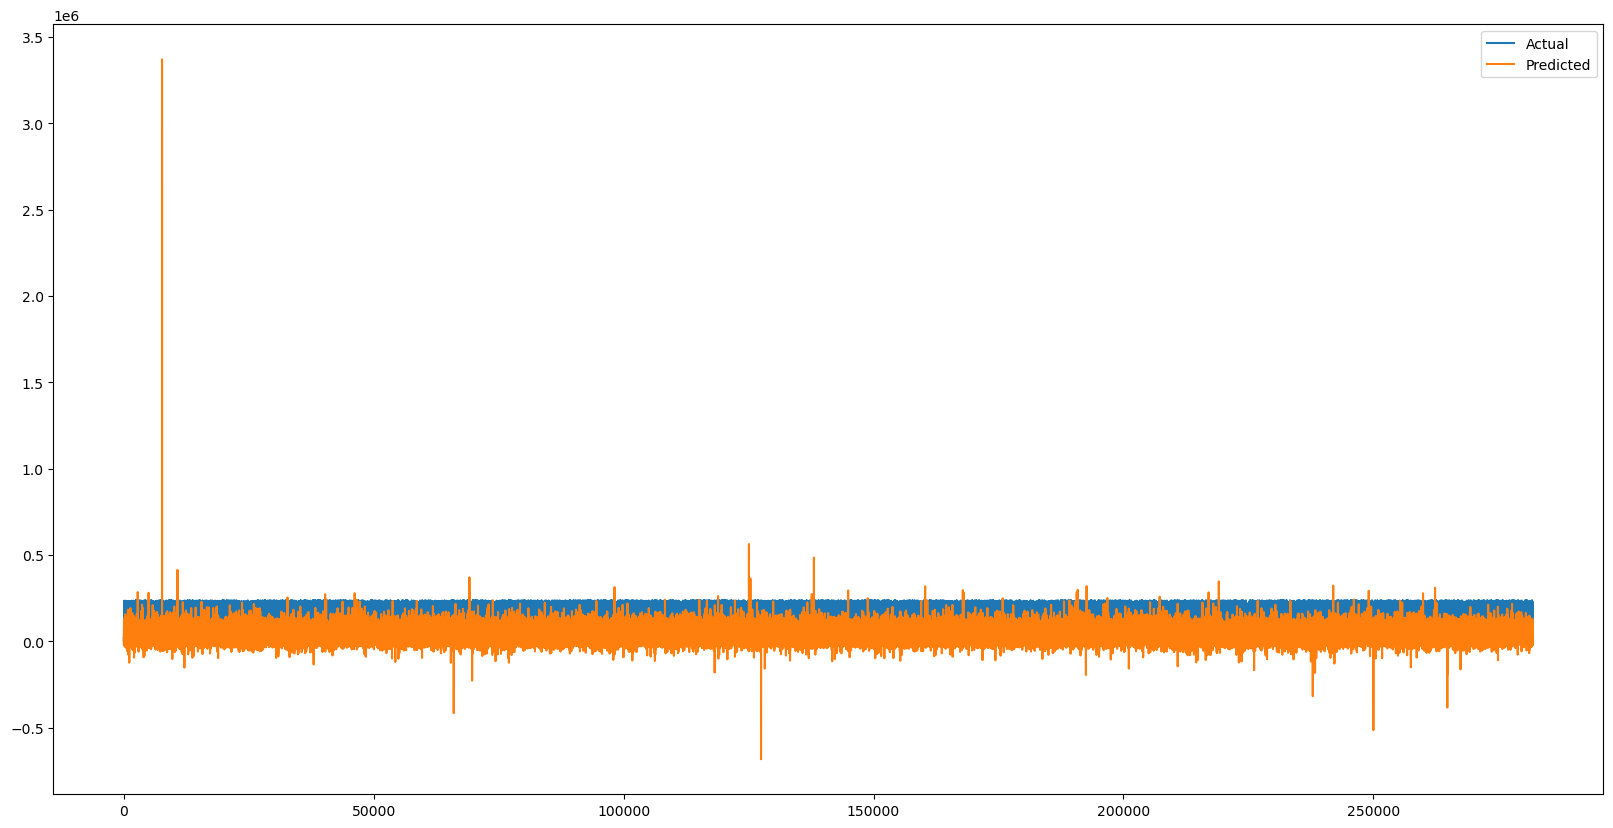

In [ ]:
c.polyregScore()
y_pred = c.polyreg_scaled.predict(c.X_test)

actual = c.y_test.copy()
#reset the index of the actual values
actual.reset_index(drop=True, inplace=True)
results = pd.DataFrame({'Actual': actual, 'Predicted': y_pred})

plt.plot(actual, label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
#set the dimension of the plot so taht the x axis is not to small
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

In [ ]:
c.polyregScore()

0.28447377871818735

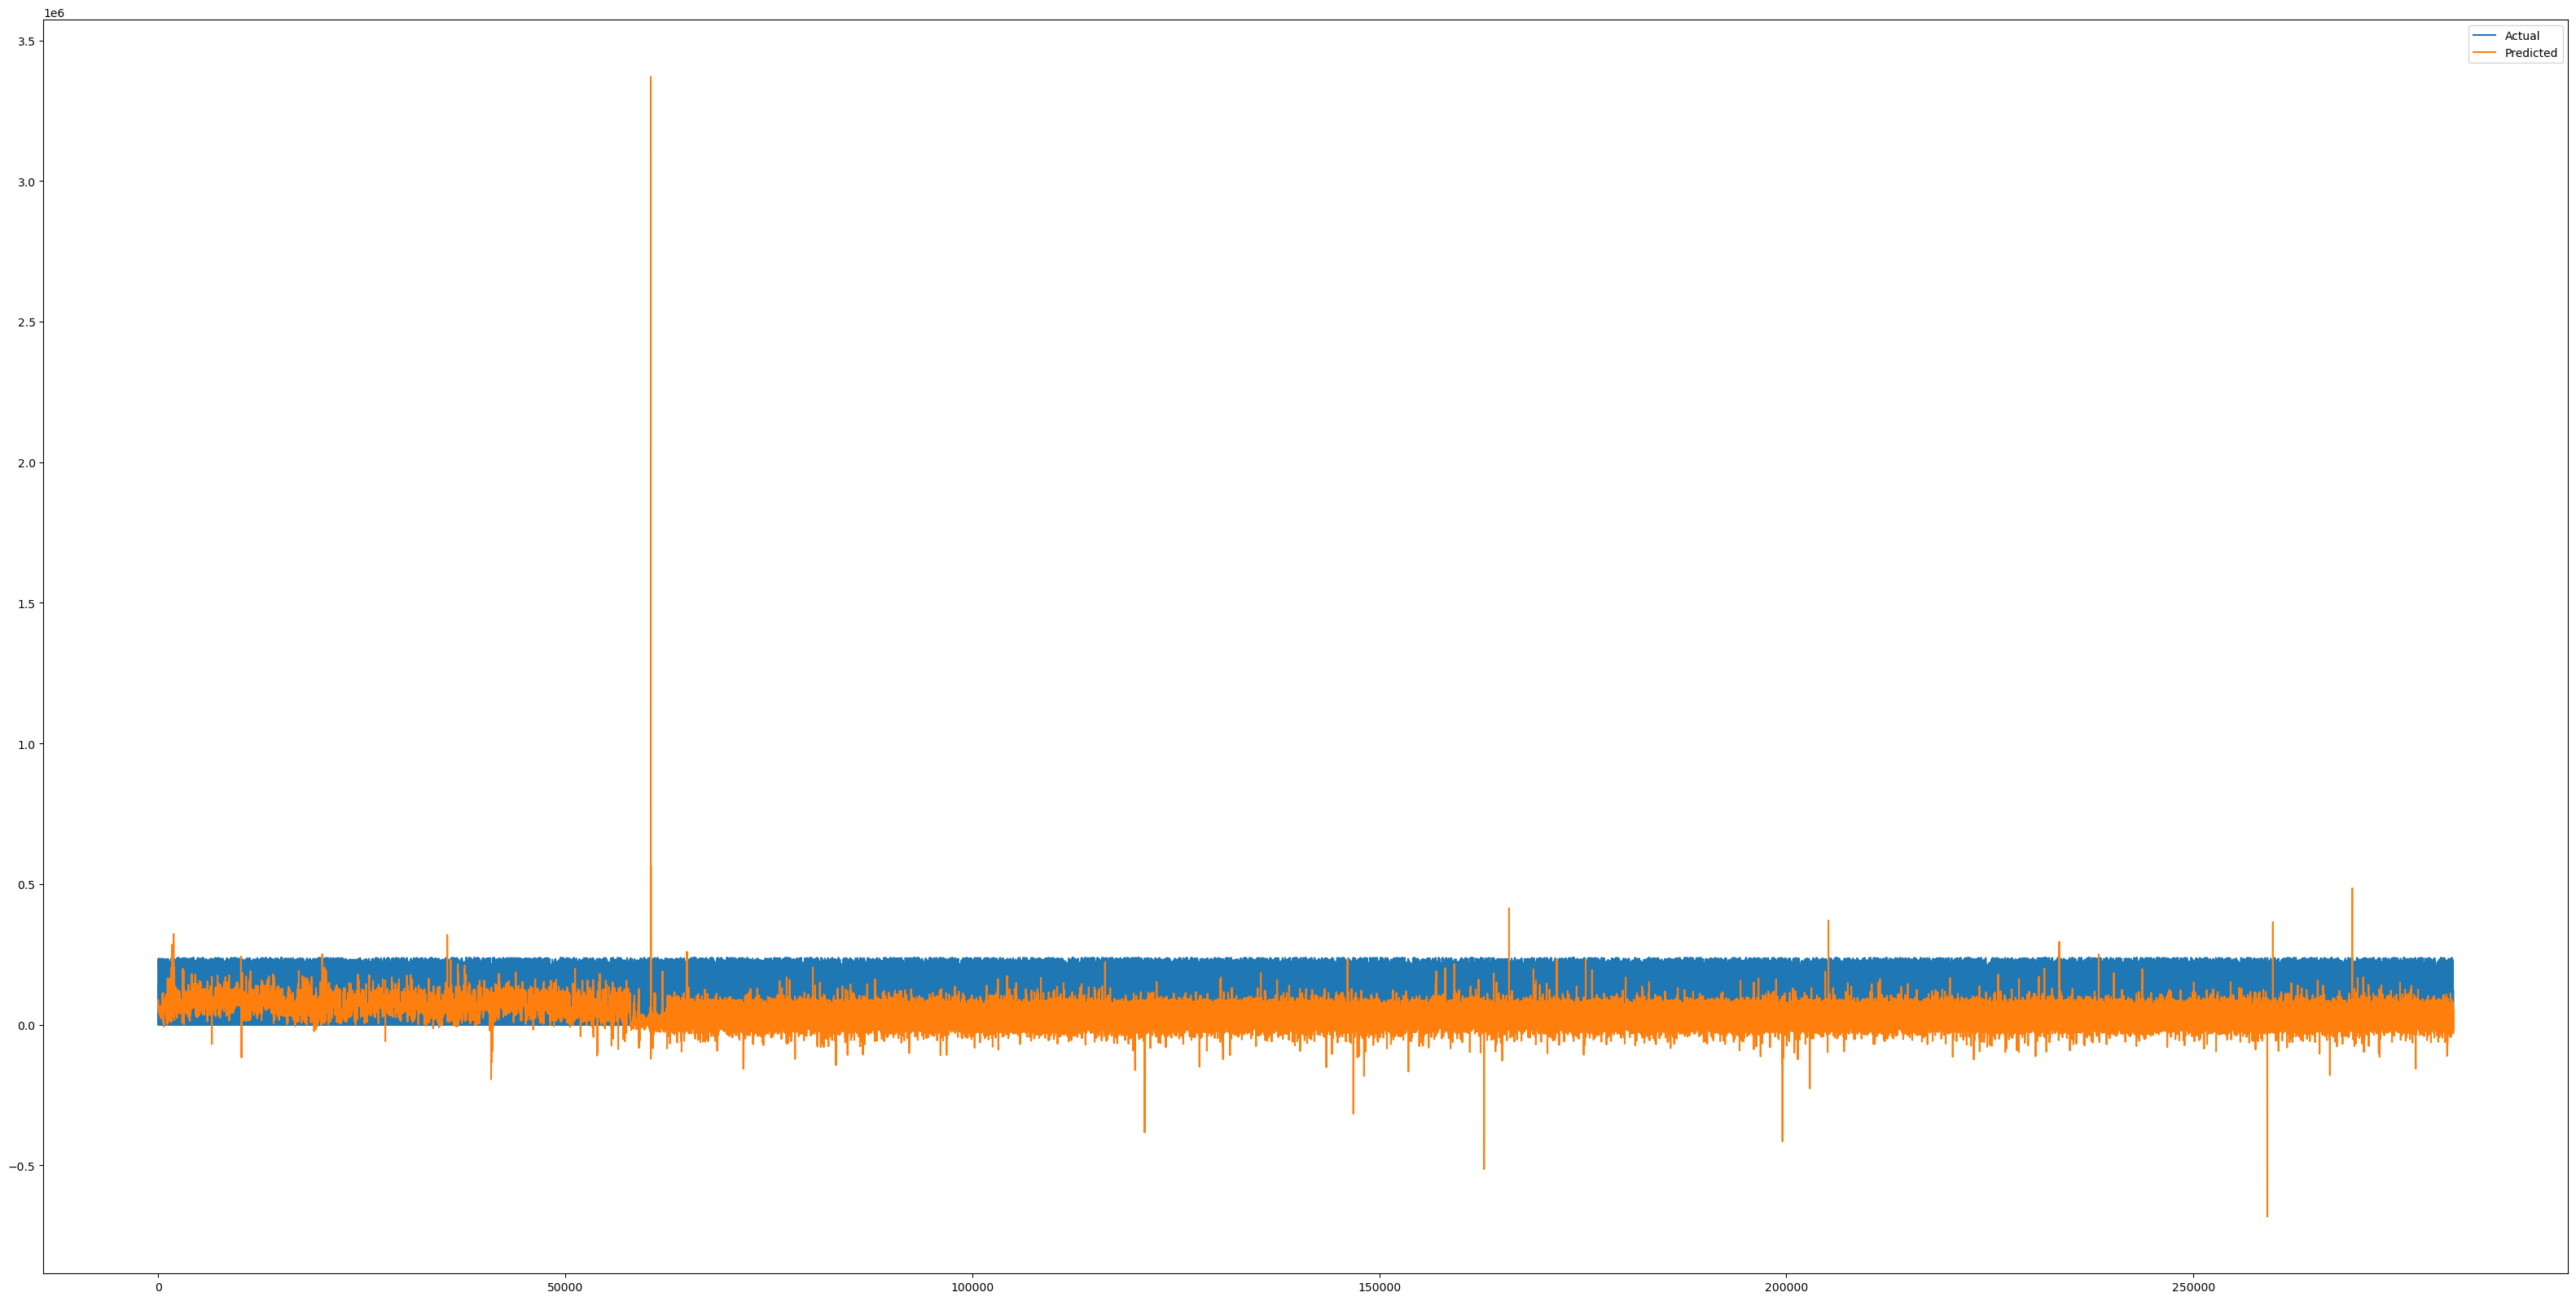

In [ ]:
#order the results df by the actual values descending
results.sort_values(by=['Actual'], ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
plt.plot(actual, label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
#set the dimension of the plot so taht the x axis is not to small
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

<AxesSubplot: >

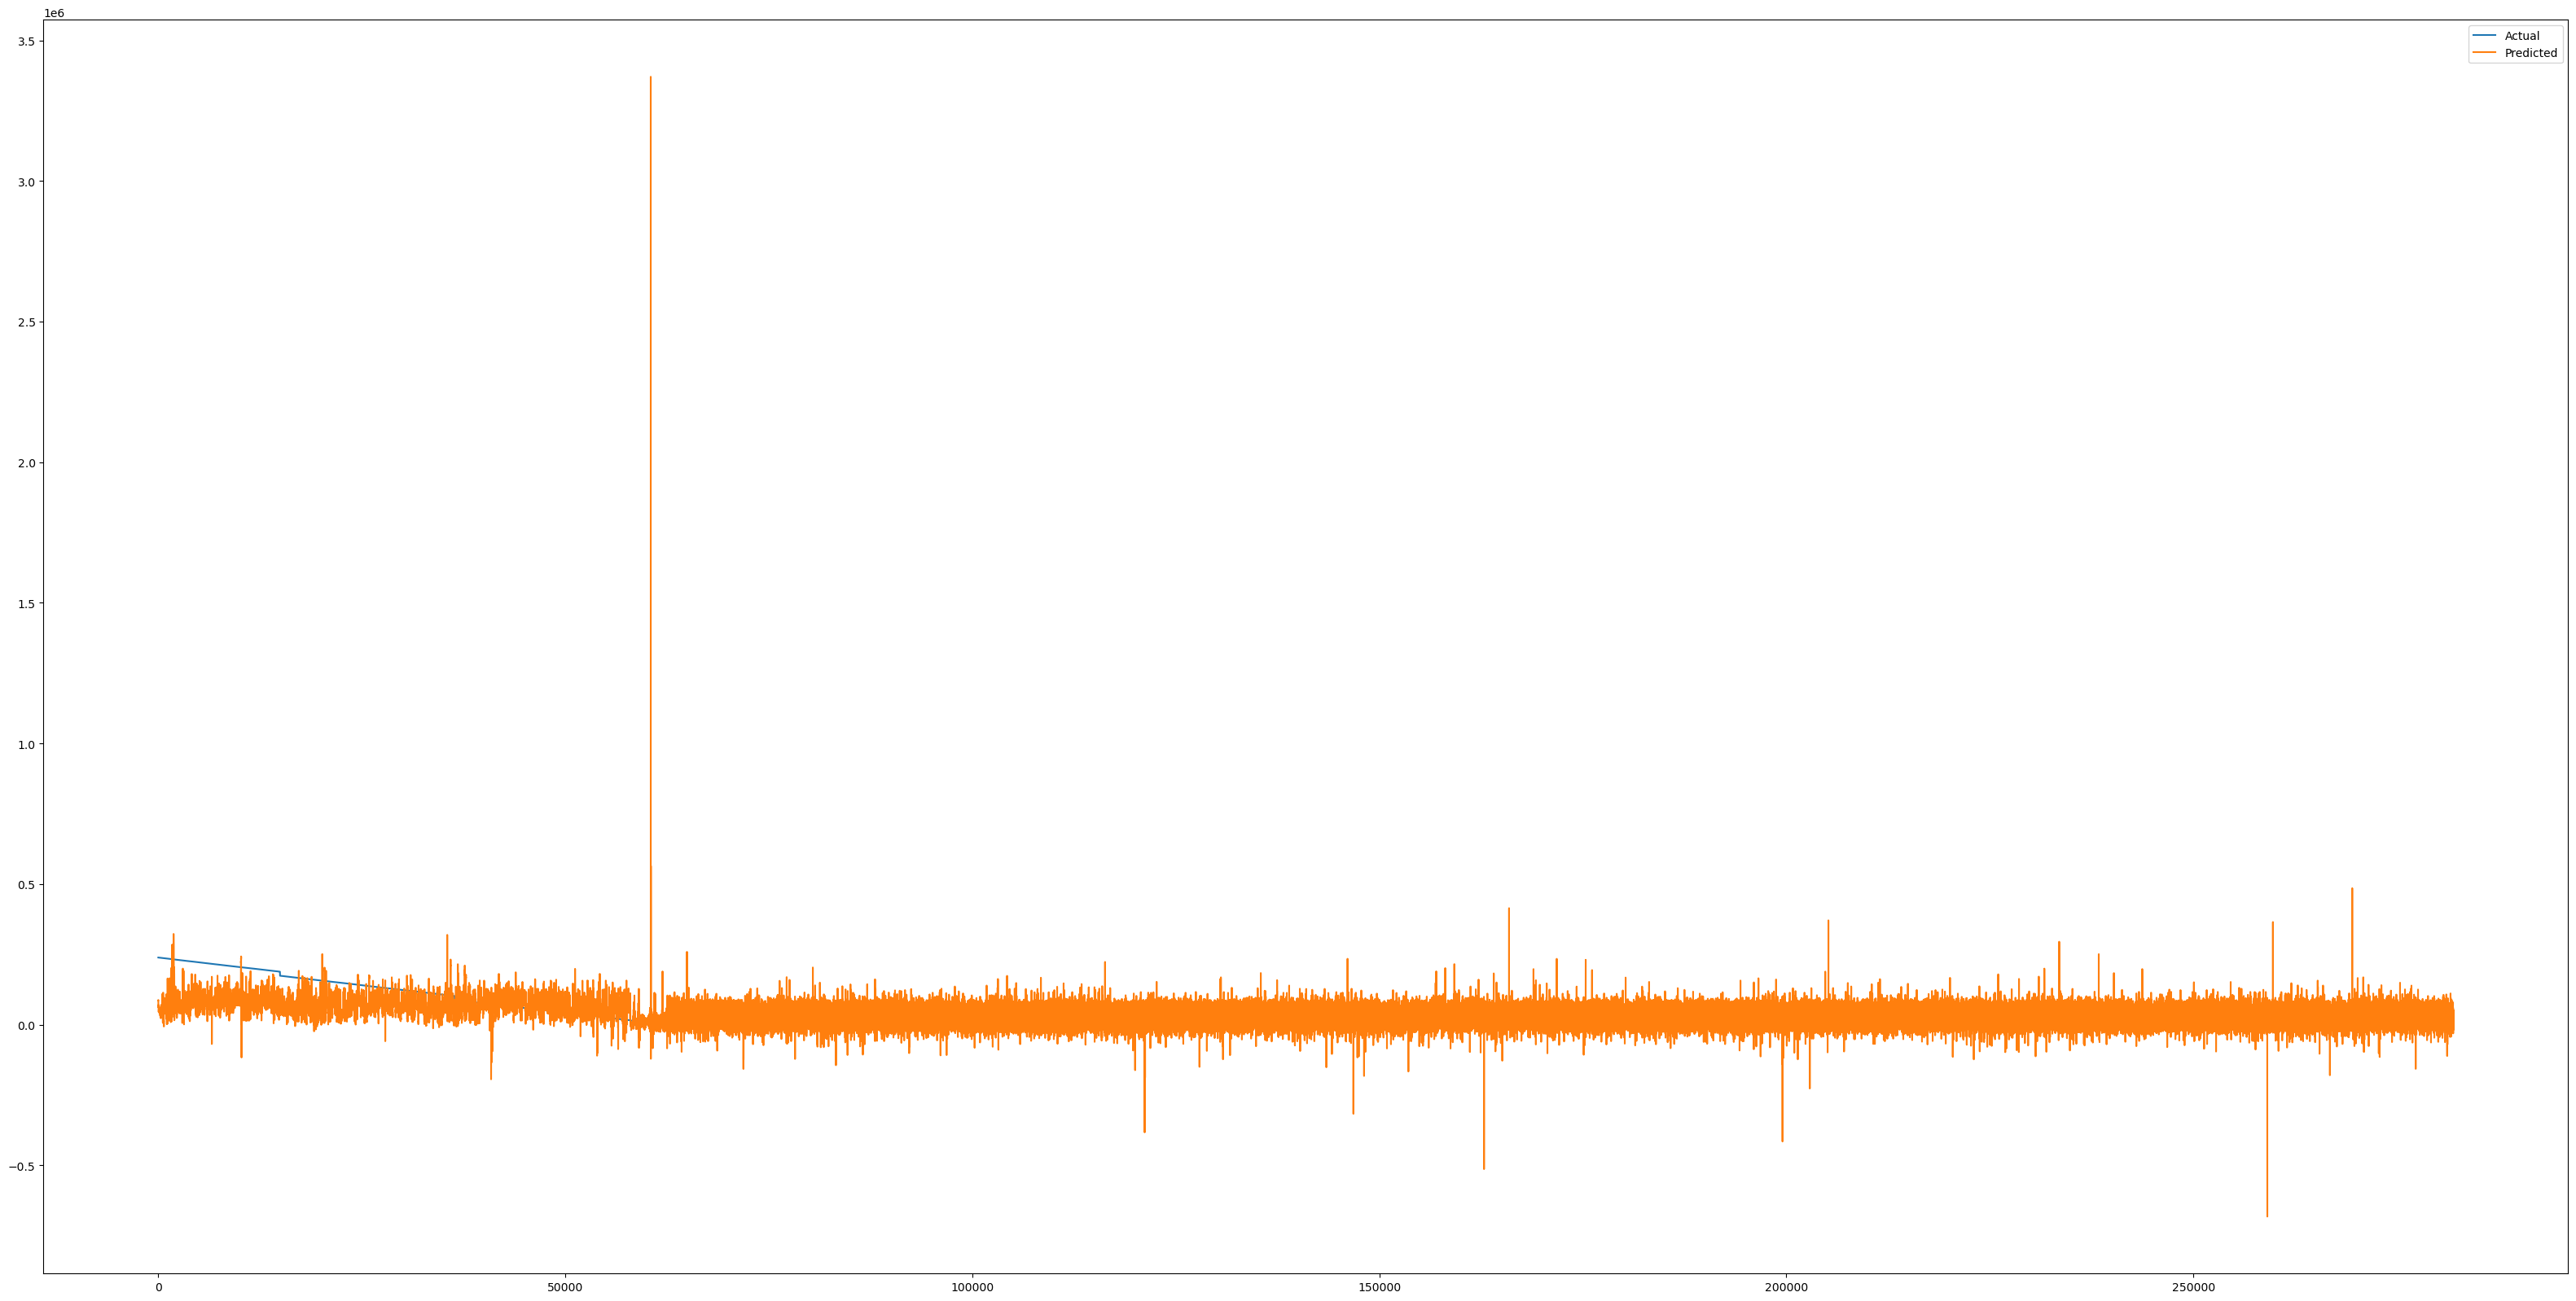

In [ ]:
results.plot()

---
#### 2. Ansatz: Verbleibende Zeit in Klassen aufteilen.
Anstelle dass die Labels die verbleibende Zeit bis zum Ende der Störung sind, werden die Labels die verbleibende Zeit in Klassen aufgeteilt.
Die Klassen sind x verbleibende Minuten. So kann ein Klassifikator auf das Problem angewand werden, alledings kann bei diesem Ansatz selbst ein perfekter klassifikator die zeit nur so genau vorhersagen wie die Klassen aufgeteilt sind.

In [63]:
#read the test data again 
df_remaining = pd.read_csv('dataset_train.csv')

#set the timestamp column to datetime
df_remaining['timestamp'] = pd.to_datetime(df_remaining['timestamp'])

#set the labels to 0
df_remaining['Label'] = 0

x_minutes = 2

#now we set the labels not corresponding to the remaining seconds, but to the remaining x minutes (rounded up, so the last minute does not classify as 0)
def LabelGeneration(row):
    timestamp = row['timestamp']

    #Fail 1
    if timestamp > err_1_start and timestamp <= err_1_end:
        return math.ceil((err_1_end - timestamp).total_seconds() / (60*x_minutes))

    #Fail 2
    if timestamp > err_2_start and timestamp <= err_2_end:
        return math.ceil((err_2_end - timestamp).total_seconds() / (60*x_minutes))

    #Fail 3
    if timestamp > err_3_start and timestamp <= err_3_end:
        return math.ceil((err_3_end - timestamp).total_seconds() / (60*x_minutes))

    #No Fail
    return 0

df_remaining['Label'] = df_remaining.apply(lambda row: LabelGeneration(row), axis=1)

In [64]:
df_remaining[(df_remaining['timestamp'] > '2022-03-23 15:00:00') & (df_remaining['timestamp'] <= '2022-03-23 15:24:00')]

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
5706258,2022-03-23 15:00:01,-0.006,9.456,9.458,-0.028,1.588,68.500,19.040281,3.8475,1,...,1,0,0,0,0,-8.69291,41.1853,21,1,12
5706259,2022-03-23 15:00:02,-0.008,9.456,9.458,-0.028,1.590,68.575,19.049625,3.9225,1,...,1,0,0,0,0,-8.69296,41.1853,22,1,12
5706260,2022-03-23 15:00:03,-0.006,9.456,9.460,-0.026,1.590,68.575,19.030938,3.8550,1,...,1,0,0,0,0,-8.69300,41.1853,22,1,12
5706261,2022-03-23 15:00:04,-0.008,9.454,9.456,-0.028,1.588,68.600,19.030938,3.8025,1,...,1,0,0,0,0,-8.69304,41.1854,21,1,12
5706262,2022-03-23 15:00:05,-0.006,9.456,9.456,-0.028,1.590,68.525,19.030938,3.8875,1,...,1,0,0,0,0,-8.69308,41.1854,20,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707693,2022-03-23 15:23:56,-0.010,8.984,8.990,-0.030,1.590,73.950,19.040281,3.8325,1,...,1,0,0,0,0,-8.67971,41.1804,17,1,1
5707694,2022-03-23 15:23:57,-0.012,8.982,8.990,-0.030,1.590,74.000,19.049625,3.8275,1,...,1,0,0,0,0,-8.67966,41.1803,18,1,1
5707695,2022-03-23 15:23:58,-0.010,8.984,8.990,-0.028,1.590,73.900,19.040281,3.9100,1,...,1,0,0,0,0,-8.67961,41.1803,20,1,1
5707696,2022-03-23 15:23:59,-0.010,8.984,8.990,-0.028,1.592,73.900,19.030938,3.8650,1,...,1,0,0,0,0,-8.67956,41.1803,19,1,1


Jetzt können wieder die gleichen Klassifikatoren wie oben angewandt werden.

In [65]:
remaining_classifier = MetroBinaryClassifier(use_shortened=True, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])

_,_,_,_ = remaining_classifier.prepareData(df_remaining, do_scale=True, do_pca=False)

Index(['TP2_mean', 'TP2_std', 'TP2_min', 'TP2_max', 'TP3_mean', 'TP3_std',
       'TP3_min', 'TP3_max', 'H1_mean', 'H1_std', 'H1_min', 'H1_max',
       'DV_pressure_mean', 'DV_pressure_std', 'DV_pressure_min',
       'DV_pressure_max', 'Reservoirs_mean', 'Reservoirs_std',
       'Reservoirs_min', 'Reservoirs_max', 'Oil_temperature_mean',
       'Oil_temperature_std', 'Oil_temperature_min', 'Oil_temperature_max',
       'Flowmeter_mean', 'Flowmeter_std', 'Flowmeter_min', 'Flowmeter_max',
       'Motor_current_mean', 'Motor_current_std', 'Motor_current_min',
       'Motor_current_max', 'COMP_mean', 'COMP_std', 'COMP_min', 'COMP_max',
       'DV_eletric_mean', 'DV_eletric_std', 'DV_eletric_min', 'DV_eletric_max',
       'Towers_mean', 'Towers_std', 'Towers_min', 'Towers_max', 'MPG_mean',
       'MPG_std', 'MPG_min', 'MPG_max', 'LPS_mean', 'LPS_std', 'LPS_min',
       'LPS_max', 'Pressure_switch_mean', 'Pressure_switch_std',
       'Pressure_switch_min', 'Pressure_switch_max', 'Oil_level_m

In [66]:
#print("Fitting Decision Tree..")
#remaining_classifier.fitDecisionTree()
print("Fitting Random Forest..")
remaining_classifier.fitRandomForest()
# print("Fitting Naive Bayes..")
# remaining_classifier.fitNaiveBayes()
# print("Fitting Linear Regression..")
# remaining_classifier.fitLinearDiscriminantAnalysis()

Fitting Random Forest..


In [67]:
#remaining_classifier.evalModels()

In [68]:
remaining_classifier.random_forest.score(remaining_classifier.X_test, remaining_classifier.y_test)

0.9971343148068678

In [69]:
remaining_classifier.randomForestConfusionMatrix()

Error in callback <function _draw_all_if_interactive at 0x0000029A17294310> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#remaining_classifier.ConfusionMatricesis()

### Aufgabe 4 (Vorhersage der gestorten Komponente) 
Untersuchen Sie, ob sich der Datensatz auch dazu eignet, die von einer Storung betroffenen Komponente anhand der Sensordaten zu identifizieren. Erstellen und evaluieren Sie dazu entsprechende Modelle.

In [55]:
#read data from csv, because we need to reassing the labels
df_type = pd.read_csv('dataset_train.csv')
df_type['timestamp'] = pd.to_datetime(df_type['timestamp'])


In [56]:
#for the 3 error timespans set a label colum that from 1 to 3 and the rest to 0
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)

#add a label column to the dataframe that is only zeros
df_type['Label'] = 0

#if the data is between err_1_start and err_1_end set the label to 1
df_type.loc[(df_type['timestamp'] >= err_1_start) & (df_type['timestamp'] <= err_1_end), 'Label'] = 1

#if the data is between err_2_start and err_2_end set the label to 2
df_type.loc[(df_type['timestamp'] >= err_2_start) & (df_type['timestamp'] <= err_2_end), 'Label'] = 2

#if the data is between err_3_start and err_3_end set the label to 3
df_type.loc[(df_type['timestamp'] >= err_3_start) & (df_type['timestamp'] <= err_3_end), 'Label'] = 3


In [57]:
clf = MetroBinaryClassifier(use_shortened=False, n_components=0.95, window_size=60, test_size=0.3, random_state=0, max_depth=3, min_samples_leaf=10, excluded_columns=['timestamp', 'Label', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'])
_,_,_,_ = clf.prepareData(df_type, do_scale=False, do_pca=False)

Index(['TP2_mean', 'TP2_std', 'TP2_min', 'TP2_max', 'TP3_mean', 'TP3_std',
       'TP3_min', 'TP3_max', 'H1_mean', 'H1_std', 'H1_min', 'H1_max',
       'DV_pressure_mean', 'DV_pressure_std', 'DV_pressure_min',
       'DV_pressure_max', 'Reservoirs_mean', 'Reservoirs_std',
       'Reservoirs_min', 'Reservoirs_max', 'Oil_temperature_mean',
       'Oil_temperature_std', 'Oil_temperature_min', 'Oil_temperature_max',
       'Flowmeter_mean', 'Flowmeter_std', 'Flowmeter_min', 'Flowmeter_max',
       'Motor_current_mean', 'Motor_current_std', 'Motor_current_min',
       'Motor_current_max', 'COMP_mean', 'COMP_std', 'COMP_min', 'COMP_max',
       'DV_eletric_mean', 'DV_eletric_std', 'DV_eletric_min', 'DV_eletric_max',
       'Towers_mean', 'Towers_std', 'Towers_min', 'Towers_max', 'MPG_mean',
       'MPG_std', 'MPG_min', 'MPG_max', 'LPS_mean', 'LPS_std', 'LPS_min',
       'LPS_max', 'Pressure_switch_mean', 'Pressure_switch_std',
       'Pressure_switch_min', 'Pressure_switch_max', 'Oil_level_m

In [58]:
clf.fitRandomForest()

In [62]:
clf.fitDecisionTree()

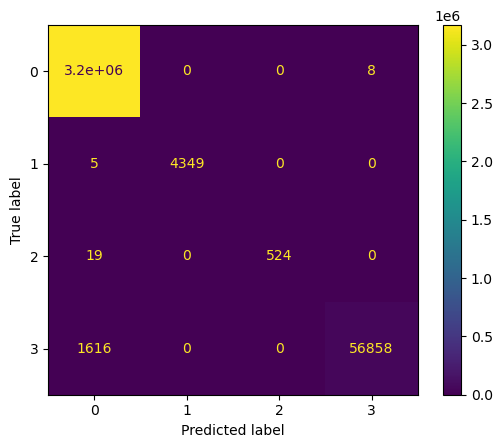

In [59]:
clf.randomForestConfusionMatrix()

In [60]:
clf.evalModels()

{'0': [0.9994827020616215], '3': [0.9998593183976365], '1': [1.0], '2': [1.0]} {'0': [0.9999974752957691], '3': [0.9723637856141191], '1': [0.9988516306844281], '2': [0.9650092081031307]} {'0': [0.9997400224136015], '3': [0.9859198890237558], '1': [0.9994254854647823], '2': [0.9821930646672915]}
[]


In [61]:
clf.ConfusionMatricesis()

### Aufgabe 5 (Störungserkennung mit Hilfe von Unsupervised Learning)
Eine Herausforderung bei der Modellbildung fur Predictive Maintenance ist häufig das Fehlen von Informationen zu historischen Storungen, sodass Ansätze des Supervised Learning nicht anwendbar sind. In diesem Fall konnen Methoden des Unsupervised Learning eine Option sein. Wenden Sie auf den Datensatz aus Aufgabe 1 (ohne Labels) ein Clustering-Verfahren an und
uberprüfen Sie anhand der gegebenen Informationen zu den historischen Systemausfällen, ob und wie gut sich durch einen solchen Ansatz Ausnahmezustande (Anomalien bzw. Störungen) von "normalen" Systemzustanden der APU unterscheiden lassen.